In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import time

In [2]:
wine_data = pd.read_csv("WineQT.csv")
print(wine_data.shape)
feature_names = wine_data.columns.to_list()
# print(feature_names)

(1143, 13)


In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
wine_data_ = wine_data.values
X = wine_data_[:, 0:11]
y = wine_data_[:, 11]
y = y.astype(int)

In [6]:
np.unique(y)

array([3, 4, 5, 6, 7, 8])

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
class LogisticRegressor:
    def __init__(self, X, y, learning_rate = 0.005, max_epoch = 10000):
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch
        self.loss = 0
        self.X = np.column_stack((np.ones((X.shape[0], 1)), X))
        self.y = y
        # self.X_val = np.column_stack((np.ones((X_val.shape[0], 1)), X_val))
        # self.y_val = y_val
        self.n_samples, self.n_features = self.X.shape
        self.n_classes = 11
        self.weights = np.random.rand(self.n_features, self.n_classes)

    def one_hot_encoding(self, y):    
        y_encoded = np.zeros((len(y), self.n_classes))
        y_encoded[np.arange(len(y)), y] = 1
        return y_encoded

    def softmax(self, Z):
        y_pred = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        return y_pred
    
    def loss_function(self, y_actual, y_pred):
        loss = -1/self.n_samples * np.sum(y_actual * np.log(y_pred))
        return loss

    def accuracy(self, y_actual, y_pred):
        y_pred = np.argmax(y_pred, axis=1)
        y_actual = np.argmax(y_actual, axis=1)
        accuracy = np.mean(y_pred == y_actual)
        return accuracy

    def loss_derivate_gradient(self, y_actual, y_pred):
        gradient = -1/self.n_samples * np.dot(self.X.T, (y_actual - y_pred))
        return gradient

    def fit(self):
        train_loss = []
        train_accuracy = []
        epochCount =0

        while(epochCount <  self.max_epoch):
            y_actual = self.one_hot_encoding(self.y)
            Z = np.matmul(self.X, self.weights)
            y_pred = self.softmax(Z)
            loss = self.loss_function(y_actual, y_pred)
            accuracy = self.accuracy(y_actual, y_pred)
            gradient = self.loss_derivate_gradient(y_actual, y_pred)
            self.weights = self.weights - self.learning_rate * gradient
            train_loss.append(loss)
            train_accuracy.append(accuracy)

            # y_actual_val = self.one_hot_encoding(self.y_val)
            # Z = np.matmul(self.X_val, self.weights)
            # y_pred_val = self.softmax(Z)
            # loss_val = self.loss_function(y_actual_val, y_pred_val) * self.n_samples / self.X_val.shape[0]
            # accuracy_val = self.accuracy(y_actual_val, y_pred_val)
            # val_loss.append(loss_val)
            # val_accuracy.append(accuracy_val)
            epochCount += 1

            
        self.loss = loss
        self.train_loss = train_loss
        self.train_accuracy = train_accuracy
        # self.val_loss = val_loss
        # self.val_accuracy = val_accuracy

    def show_err_graph(self):
        plt.figure(figsize=(10, 6))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.train_loss)+1), self.train_loss)
        plt.xlabel("Number of Epoch")
        plt.ylabel("Loss")
        plt.title("Loss vs Number of Epoch")

        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.train_accuracy)+1), self.train_accuracy)
        plt.xlabel("Number of Epoch")
        plt.ylabel("Accuracy")
        plt.title("Accuracy vs Number of Epoch")

    def predict(self, X):
        constant_column = np.ones((X.shape[0], 1))
        X = np.column_stack((constant_column, X))

        Z = np.matmul(X, self.weights)
        y_pred = self.softmax(Z)
        y_pred = np.argmax(y_pred, axis=1)
        return y_pred

    def predict_proba(self, X):
        constant_column = np.ones((X.shape[0], 1))
        X = np.column_stack((constant_column, X))

        Z = np.matmul(X, self.weights)
        y_pred = self.softmax(Z)
        return y_pred
    
    def validate(self, X, y):
        n_samples, _ = X.shape
        y_pred = self.predict(X)
        constant_column = np.ones((X.shape[0], 1))
        X = np.column_stack((constant_column, X))
        accuracy = np.mean(y_pred == y)
        self.loss = self.loss_function(n_samples, self.one_hot_encoding(y, self.n_classes), self.softmax(np.matmul(X, self.weights)))

        return accuracy, self.loss

    def get_metric_for_each_epoch(self):
        return self.train_accuracy, self.train_loss

In [9]:
class LogisticRegressor_:
    def __init__(self, learning_rate = 0.005):
        self.lr = learning_rate

    def fit(self, X, y):
        self.model = LogisticRegressor(X, y, learning_rate= self.lr)
        self.model.fit()

    def predict(self, X):
        return self.model.predict(X)

In [10]:
class LinearRegressor:
    def __init__(self, X, y, learning_rate = 0.1, max_epoch = 10000):
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch
        self.loss = 0
        self.X = np.column_stack((np.ones((X.shape[0], 1)), X))
        self.y = y
        self.n_samples, self.n_features = self.X.shape
        self.weights = np.ones(self.n_features)/5
    
    def loss_function(self, y_actual, y_pred):
        loss = -1/(2*self.n_samples) * np.sum((y_actual-y_pred)**2)
        return loss

    def loss_derivate_gradient(self, y_actual, y_pred):
        gradient = -(1/self.n_samples) * np.dot(self.X.T, (y_actual - y_pred))
        return gradient

    def fit(self):
        train_loss = []
        epochCount =0

        while(epochCount <  self.max_epoch):
            y_pred = np.matmul(self.X, self.weights)
            # print(y_pred.shape)
            loss = self.loss_function(self.y, y_pred)
            gradient = self.loss_derivate_gradient(self.y, y_pred)
            self.weights = self.weights - self.learning_rate * gradient
            # print(self.weights.shape)
            train_loss.append(loss)
            epochCount += 1

        self.loss = loss
        self.train_loss = train_loss

    def show_err_graph(self):
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.train_loss)+1), self.train_loss)
        plt.xlabel("Number of Epoch")
        plt.ylabel("Loss")
        plt.title("Loss vs Number of Epoch")

    def predict(self, X):
        constant_column = np.ones((X.shape[0], 1))
        X = np.column_stack((constant_column, X))
        y_pred = np.matmul(X, self.weights)
        return y_pred

    def get_metric_for_each_epoch(self):
        return self.train_accuracy, self.train_loss

In [11]:
class LinearRegressor_:
    def __init__(self, learning_rate = 0.1):
        self.lr = learning_rate

    def fit(self, X, y):
        self.model = LinearRegressor(X, y, learning_rate= self.lr)
        self.model.fit()

    def predict(self, X):
        return self.model.predict(X)

In [12]:
class MLPRegressor:
    def __init__(self, X, y, activation_func = 'relu', optimizer = 'batch', learning_rate = 0.00005, max_epochs = 250, hidden_layer_neurons = 8, hidden_layers = 1):
        self.X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.y = y.reshape(-1,1)
        self.activation_func = activation_func
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.hidden_layer_neurons = hidden_layer_neurons
        self.n_hidden_layers = hidden_layers
        self.n_samples = self.X.shape[0]
        self.layer_sizes = np.array([self.X.shape[1]] + [self.hidden_layer_neurons] * self.n_hidden_layers + [self.y.shape[1]])
        self.__init_weights()
        self.train_loss = list()
        self.train_accuracy = list()

    def __init_weights(self):
        self.weights = list()
        self.biases = list()
        np.random.seed(42)
        if self.activation_func == 'relu':
            for i in range(self.layer_sizes.shape[0] - 1):
                self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * np.sqrt(2.0 / self.layer_sizes[i]))
                self.biases.append(np.zeros((1, self.layer_sizes[i+1])))
            return 
        if self.activation_func == 'sigmoid':
            for i in range(self.layer_sizes.shape[0] - 1):
                self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * np.sqrt(1.0 / self.layer_sizes[i]))
                self.biases.append(np.zeros((1, self.layer_sizes[i+1])))
            return
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1/(math.sqrt(self.n_samples)), 1/(math.sqrt(self.n_samples)), (self.layer_sizes[i], self.layer_sizes[i + 1]))*0.1)
            self.biases.append(np.zeros((1, self.layer_sizes[i+1])))

    def __init_layers(self, batch_size):
        self.hidden_layers_z = [np.empty((batch_size, layer)) for layer in self.layer_sizes]
        self.hidden_layers_a = [np.empty((batch_size, layer)) for layer in self.layer_sizes]

    def __activation(self, x):
        if(self.activation_func=='sigmoid'):
            return 1 / (1 + np.exp(-np.clip(x, -100, 100)))
        if(self.activation_func=='relu'):
            return np.maximum(0, x)
        if(self.activation_func=='tanh'):
            return np.tanh(x)
    
    def __activation_prime(self, x):
        if(self.activation_func=='sigmoid'):
            x = 1/(1+np.exp(-np.clip(x, -100, 100)))
            return np.multiply(x, (1 - x))
        if(self.activation_func=='relu'):
            # x = np.maximum(0, x)
            return np.where(x <= 0, 0., 1.)
        if(self.activation_func=='tanh'):
            x = np.tanh(x)
            return 1 - x**2
        
    def __loss(self, y, y_pred):
        # print(y[0], y_pred[0])
        y_pred = np.nan_to_num(y_pred, nan=0.0)
        return (1/(2*self.batch_size)) * np.sum((y-y_pred)**2)
    
    def __forward_propagation(self, x):
        input = x
        self.hidden_layers_a[0] = input
        for i, (weights, bias) in enumerate(zip(self.weights, self.biases)):
            self.hidden_layers_z[i+1] = np.dot(input, weights) + bias
            input = self.__activation(self.hidden_layers_z[i+1])
            self.hidden_layers_a[i+1] = input
        self.output_layer = self.hidden_layers_z[-1]

    def __backward_propagation(self, y):
        delta_t = (self.output_layer-y)
        # print(y.shape)
        for i in range(1, len(self.weights)+1):
            delta_t_ = self.__activation_prime(self.hidden_layers_z[-i-1]) * np.dot(delta_t, self.weights[-i].T)
            self.weights[-i] -= self.learning_rate * np.dot(self.hidden_layers_a[-i-1].T, delta_t)
            self.biases[-i] -= self.learning_rate * np.sum(delta_t, axis=0, keepdims=True)
            delta_t = delta_t_

    def predict(self, X):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.__init_layers(X.shape[0]) 
        self.__forward_propagation(X)
        return self.output_layer 
    
    def train(self, batch_size = 8):
        self.batch_size = batch_size
        for epoch in range(self.max_epochs):
            self.__init_layers(batch_size)
            shuffle = np.random.permutation(self.n_samples)
            X_shuffled = self.X[shuffle]
            y_shuffled = self.y[shuffle]
            train_loss = 0
            no_of_batches = 0
            for i in range(0, self.n_samples, batch_size):
                if(self.n_samples - i <batch_size):
                    continue
                x_batch = X_shuffled[i:i+batch_size, :]
                y_batch = y_shuffled[i:i+batch_size, :]
                self.__forward_propagation(x_batch)
                train_loss += self.__loss(y_batch, self.output_layer)
                self.__backward_propagation(y_batch)
                no_of_batches += 1

            train_loss /= no_of_batches
            self.train_loss.append(train_loss)

    def fit(self):
        if(self.optimizer=='sgd'):
            self.train(batch_size=1)
        if(self.optimizer=='mini-batch'):
            self.train(batch_size=32)
        if(self.optimizer=='batch'):
            self.train(batch_size=self.n_samples)

In [13]:
# multi-layer perceptron (MLP)
class MLPClassifier:
    def __init__(self, X, y, activation_func = 'relu', optimizer = 'mini-batch', learning_rate = 0.0001, max_epochs = 2500, hidden_layer_neurons = 8, hidden_layers = 1):
        self.X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.y = np.zeros((len(y), 10+1))
        self.y[np.arange(len(y)), y] = 1
        self.activation_func = activation_func
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.hidden_layer_neurons = hidden_layer_neurons
        self.n_hidden_layers = hidden_layers
        self.n_samples = self.X.shape[0]
        self.layer_sizes = np.array([self.X.shape[1]] + [self.hidden_layer_neurons] * self.n_hidden_layers + [self.y.shape[1]])
        self.__init_weights()
        self.train_loss = list()
        self.train_accuracy = list()

    def __init_weights(self):
        self.weights = list()
        self.biases = list()
        np.random.seed(42)
        if self.activation_func == 'relu':
            for i in range(self.layer_sizes.shape[0] - 1):
                self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * np.sqrt(2.0 / self.layer_sizes[i]))
                self.biases.append(np.zeros((1, self.layer_sizes[i+1])))
            return 
        if self.activation_func == 'sigmoid':
            for i in range(self.layer_sizes.shape[0] - 1):
                self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * np.sqrt(1.0 / self.layer_sizes[i]))
                self.biases.append(np.zeros((1, self.layer_sizes[i+1])))
            return
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1/(math.sqrt(self.n_samples)), 1/(math.sqrt(self.n_samples)), (self.layer_sizes[i], self.layer_sizes[i + 1]))*0.1)
            self.biases.append(np.zeros((1, self.layer_sizes[i+1])))

    def __init_layers(self, batch_size):
        self.hidden_layers_z = [np.empty((batch_size, layer)) for layer in self.layer_sizes]
        self.hidden_layers_a = [np.empty((batch_size, layer)) for layer in self.layer_sizes]

    def __activation(self, x):
        if(self.activation_func=='sigmoid'):
            return 1 / (1 + np.exp(-x))
        if(self.activation_func=='relu'):
            return np.maximum(0, x)
        if(self.activation_func=='tanh'):
            return np.tanh(x)
    
    def __activation_prime(self, x):
        if(self.activation_func=='sigmoid'):
            x = 1/(1+np.exp(-x))
            return np.multiply(x, (1 - x))
        if(self.activation_func=='relu'):
            return np.where(x <= 0, 0., 1.)
        if(self.activation_func=='tanh'):
            x = np.tanh(x)
            return 1 - x**2
        
    def __softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)
    
    def __loss(self, y, y_pred):
        epi = 1e-10
        y_pred = np.clip(y_pred, epi, 1-epi)
        return -1/self.batch_size * np.sum(y*np.log(y_pred))
    
    def __accuracy(self, y, y_pred):
        y_pred_label = np.argmax(y_pred, axis=1)
        y_label = np.argmax(y, axis=1)
        # print(self.weights)
        return np.mean(y_pred_label == y_label)
    
    def __forward_propagation(self, x):
        input = x
        self.hidden_layers_a[0] = input
        for i, (weights, bias) in enumerate(zip(self.weights, self.biases)):
            self.hidden_layers_z[i+1] = np.dot(input, weights) + bias
            input = self.__activation(self.hidden_layers_z[i+1])
            self.hidden_layers_a[i+1] = input
        self.output_layer = self.__softmax(self.hidden_layers_a[-1])

    def __backward_propagation(self, y):
        delta_t = (self.output_layer - y)*self.__activation_prime(self.hidden_layers_z[-1])
        for i in range(1, len(self.weights)+1):
            delta_t_ = self.__activation_prime(self.hidden_layers_z[-i-1]) * np.dot(delta_t, self.weights[-i].T)
            self.weights[-i] -= self.learning_rate * np.dot(self.hidden_layers_a[-i-1].T, delta_t)
            self.biases[-i] -= self.learning_rate * np.sum(delta_t, axis=0, keepdims=True)
            delta_t = delta_t_

    def predict(self, X):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.__init_layers(X.shape[0]) 
        self.__forward_propagation(X)
        return np.argmax(self.output_layer, axis=1) 
    
    def predict_proba(self, X):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.__init_layers(X.shape[0]) 
        self.__forward_propagation(X)
        return self.output_layer 
    
    def train(self, batch_size = 8):
        self.batch_size = batch_size
        for epoch in range(self.max_epochs):
            self.__init_layers(batch_size)
            shuffle = np.random.permutation(self.n_samples)
            
            train_loss = 0
            train_accuracy = 0
            no_of_batches = 0
            X_shuffled = self.X[shuffle]
            y_shuffled = self.y[shuffle]
            train_loss = 0
            train_accuracy = 0
            no_of_batches = 0
            for i in range(0, self.n_samples, batch_size):

                if(self.n_samples - i <batch_size):
                    continue
                x_batch = X_shuffled[i:i+batch_size, :]
                y_batch = y_shuffled[i:i+batch_size, :]
                # if(x_batch.shape[0] != batch_size):
                #     continue
                self.__forward_propagation(x_batch)
                train_loss += self.__loss(y_batch, self.output_layer)
                train_accuracy += self.__accuracy(y_batch, self.output_layer)
                self.__backward_propagation(y_batch)
                no_of_batches += 1

            train_loss /= no_of_batches
            train_accuracy /= no_of_batches
            self.train_loss.append(train_loss)
            self.train_accuracy.append(train_accuracy)
            
    def fit(self):
        if(self.optimizer=='sgd'):
            self.train(batch_size=1)
        if(self.optimizer=='mini-batch'):
            self.train(batch_size=64)
        if(self.optimizer=='batch'):
            self.train(batch_size=self.n_samples)

In [14]:
class DecisionTreeRegressor_:
    def __init__(self, X, y, max_depth = 5, max_features=5, criterion='squared_error'):
        self.X = X
        self.y = y
        self.model = DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, criterion=criterion, random_state=42)

    def fit(self):
        self.model.fit(self.X, self.y)
    
    def predict(self, X):
        y_pred = self.model.predict(X)
        return y_pred

In [15]:
class DecisionTreeClassifier_:
    def __init__(self, X, y, max_depth = 5, max_features= 5, criterion = 'gini'):
        self.X = X
        # self.y = np.zeros((len(y), 10+1))
        # self.y[np.arange(len(y)), y] = 1    
        self.y = y
        self.model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion, random_state=42)

    def fit(self):
    
        self.model.fit(self.X, self.y)
    
    def predict(self, X):
        y_pred = self.model.predict(X)
        # return np.argmax(y_pred, axis=1)
        return y_pred
    
    def predict_proba(self, X):
        y_pred = self.model.predict_proba(X)
        # print(y_pred)
        return y_pred

# ENSEMBLING METHODS: BAGGING

### BAGGING CLASSIFIER

In [117]:
class baggingClassifier:
    def __init__(self, X, y, base_estimator, num_estimators=5, fraction_samples = 0.7, bootstrap = False, voting = 'soft'):
        self.X = X
        self.y = y
        self.n_samples = X.shape[0]
        self.base_estimator = base_estimator
        self.num_estimators = num_estimators
        self.fraction_samples = fraction_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.ensemble_models = []
        self.offset = min(self.y)
        self.uniques_classes = np.unique(self.y)

    def fit(self):

        for _ in range(self.num_estimators):
            if self.fraction_samples < 1.0:
                num_samples = int(self.fraction_samples*self.n_samples)
                # print(num_samples)
            else:
                num_samples = self.n_samples

            if self.bootstrap:
                indices = np.random.choice(self.n_samples, num_samples, replace=True)
            else:
                indices = np.random.permutation(self.n_samples)[:num_samples]

            if self.fraction_samples < 1.0:
                for i in range(len(self.uniques_classes)):
                    indices[i] = np.where(self.y == self.uniques_classes[i])[0][0]
                    # print(indices[i])
            
            X_bag, y_bag = self.X[indices], self.y[indices]
            model = self.base_estimator(X_bag, y_bag)
            model.fit()
            
            self.ensemble_models.append(model)
        self.ensemble_models = np.array(self.ensemble_models)

    def predict(self, X):

        if self.voting == 'hard':
            ensemble_predictions = []

            for i in range(self.num_estimators):
                predictions = self.ensemble_models[i].predict(X)
                ensemble_predictions.append(predictions)
            ensemble_predictions = np.array(ensemble_predictions)
            final_predictions = []
            for i in range(X.shape[0]):
                votes = Counter(ensemble_predictions[:, i])
                final_predictions.append(votes.most_common(1)[0][0])
            final_predictions = np.array(final_predictions)
            return final_predictions
        else:
            ensemble_probs = []

            for i in range(self.num_estimators):
                predictions_probs = self.ensemble_models[i].predict_proba(X)
                ensemble_probs.append(predictions_probs)
                break
            
            ensemble_probs = np.array(ensemble_probs)
            final_predictions = []
            for i in range(X.shape[0]):
                probs = np.mean(ensemble_probs[:, i], axis=0)
                if(self.base_estimator == DecisionTreeClassifier_):
                    votes = np.argmax(probs) + self.offset
                else:
                    votes = np.argmax(probs)
                final_predictions.append(votes)
            final_predictions = np.array(final_predictions)
            return final_predictions

In [118]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_, y_val, test_size=0.5, random_state=42)

In [19]:
# tuning the decision tree model

max_depth = [5, 10, 15, 20, 25, 30]
max_features = [5, 7, 9, 11]
criterion = ['gini', 'entropy']

max_depth_ = []
max_features_ = []
criterion_ = []
accuracy_ = []

for depth in max_depth:
    for features in max_features:
        for cri in criterion:
            model = DecisionTreeClassifier_(X_train, y_train, max_depth=depth, max_features=features, criterion=cri)
            model.fit()
            y_pred = model.predict(X_test)
            accuracy = np.mean(y_pred == y_test)
            max_depth_.append(depth)
            max_features_.append(features)
            criterion_.append(cri)
            accuracy_.append(accuracy)

In [20]:
df = pd.DataFrame({'max_depth': max_depth_, 'max_features': max_features_, 'criterion': criterion_, 'accuracy': accuracy_})
df = df.sort_values(by=['accuracy'], ascending=False)
df

,max_depth,max_features,criterion,accuracy
24,20,5,gini,0.603499
4,5,9,gini,0.603499
2,5,7,gini,0.600583
16,15,5,gini,0.600583
40,30,5,gini,0.597668
32,25,5,gini,0.597668
6,5,11,gini,0.594752
1,5,5,entropy,0.588921
41,30,5,entropy,0.586006
22,15,11,gini,0.586006


In [18]:
np.unique(y_train)

array([3, 4, 5, 6, 7, 8])

In [19]:
# model = LogisticRegressor(X_train, y_train)
# model.fit()

# y_pred = model.predict(X_val)
# print("Accuracy: ", np.mean(y_pred == y_val))

In [22]:
model = baggingClassifier(X_train, y_train, DecisionTreeClassifier_, voting='soft', num_estimators=20, fraction_samples=0.50)
model.fit()

In [23]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print(accuracy)

0.5743440233236151


In [24]:
print(y_pred)

[6 5 5 5 7 7 5 5 5 5 6 6 5 6 5 5 6 5 5 7 6 7 5 7 5 5 5 6 5 5 5 5 7 5 5 5 5
 6 6 6 6 5 6 5 5 5 5 7 5 6 6 5 5 5 6 7 5 6 6 5 5 6 5 7 6 5 7 5 5 5 6 6 5 6
 5 5 7 6 5 5 5 6 5 5 5 7 5 5 7 5 5 6 5 5 5 5 5 6 3 5 7 6 5 5 5 5 5 7 7 7 7
 6 6 6 5 5 5 7 5 5 5 5 5 6 3 5 6 6 5 7 5 3 7 5 6 5 3 5 5 6 7 5 5 5 6 5 5 5
 5 5 7 5 6 5 7 5 5 6 7 7 5 5 6 5 6 5 6 5 5 5 6 5 6 5 5 5 6 6 5 5 6 6 6 5 5
 5 8 5 6 5 6 5 5 6 5 5 5 6 7 6 6 6 5 5 5 5 5 5 7 6 5 7 5 6 6 5 6 5 6 5 6 6
 5 5 5 7 5 5 5 5 7 7 5 5 6 7 5 6 6 5 7 7 7 5 5 6 5 5 7 5 6 6 6 5 5 6 7 5 5
 5 5 5 7 5 5 5 5 7 5 5 5 7 6 6 5 5 5 5 5 5 5 5 5 5 6 7 5 5 5 7 6 5 7 5 7 7
 6 5 7 5 5 6 6 5 5 5 7 6 7 5 6 6 5 5 5 5 5 5 6 5 5 7 6 5 3 6 6 5 5 5 6 5 5
 7 6 5 6 5 6 5 5 3 5]


### BAGGING REGRESSION

In [24]:
class baggingRegressor:
    def __init__(self, X, y, base_estimator, num_estimators=5, fraction_samples = 0.7, bootstrap = False, voting = 'hard'):
        self.X = X
        self.y = y
        self.n_samples = X.shape[0]
        self.base_estimator = base_estimator
        self.num_estimators = num_estimators
        self.fraction_samples = fraction_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.ensemble_models = []

    def fit(self):

        for _ in range(self.num_estimators):
            if self.fraction_samples < 1.0:
                num_samples = int(self.fraction_samples*self.n_samples)
            else:
                num_samples = self.n_samples

            if self.bootstrap:
                indices = np.random.choice(self.n_samples, num_samples, replace=True)
            else:
                indices = np.random.permutation(self.n_samples)[:num_samples]
            
            X_bag, y_bag = self.X[indices], self.y[indices]
            model = self.base_estimator(X_bag, y_bag)
            model.fit()
            
            self.ensemble_models.append(model)
        self.ensemble_models = np.array(self.ensemble_models)

    def predict(self, X):

        if self.voting == 'hard':
            ensemble_predictions = []

            for i in range(self.num_estimators):
                predictions = self.ensemble_models[i].predict(X).flatten()
                # print(predictions.shape)
                ensemble_predictions.append(predictions)
            ensemble_predictions = np.array(ensemble_predictions)
            final_predictions = []
            for i in range(X.shape[0]):
                y_preds = ensemble_predictions[:, i]
                final_predictions.append(np.mean(y_preds))
            final_predictions = np.array(final_predictions)
            return final_predictions
        else:
            weighted_predictions = np.zeros(X.shape[0])
            total_weight = 0

            _, X_val, _, y_val = train_test_split(self.X, self.y, test_size=0.20, random_state=42)

            for i in range(self.num_estimators):
                val_predictions = self.ensemble_models[i].predict(X_val).flatten()
                confidence = 1.0 / (np.mean((val_predictions - y_val)**2) + 1e-6)
                predictions = self.ensemble_models[i].predict(X).flatten()
                weighted_predictions += confidence * predictions
                total_weight += confidence  
            final_predictions= weighted_predictions/total_weight
            
            return final_predictions

In [25]:
housing_data = pd.read_csv('HousingData.csv')
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
housing_data.describe()
housing_data = housing_data[housing_data['MEDV'] != 50.0]

means = housing_data.mean()

housing_data.fillna(means, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5140\3245678533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data.fillna(means, inplace=True)


In [27]:
max(housing_data['CHAS'])

1.0

In [28]:
X_ = housing_data.drop(columns=['MEDV']).values
y_ = housing_data['MEDV'].values

scaler = StandardScaler()
X_ = scaler.fit_transform(X_)
y_ = y_.tolist()
y_ = np.asarray(y_)


In [29]:

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=42)
# X_val_, X_test_, y_val_, y_test_ = train_test_split(X_test_, y_test_, test_size=0.5, random_state=42)

In [27]:
max_depth = [5, 10, 15, 20, 25, 30]
max_features = [5, 7, 9, 11]
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

max_depth_ = []
max_features_ = []
criterion_ = []
loss_ = []

for depth in max_depth:
    for features in max_features:
        for cri in criterion:
            model = DecisionTreeRegressor_(X_train, y_train, max_depth=depth, max_features=features, criterion=cri)
            model.fit()
            y_pred = model.predict(X_test)
            loss = np.mean((y_pred - y_test)**2)
            max_depth_.append(depth)
            max_features_.append(features)
            criterion_.append(cri)
            loss_.append(loss)

In [29]:
df = pd.DataFrame({'max_depth': max_depth_, 'max_features': max_features_, 'criterion': criterion_, 'loss': loss_})
df = df.sort_values(by=['loss'], ascending=True)
df

,max_depth,max_features,criterion,loss
0,5,5,squared_error,0.407170
2,5,5,friedman_mse,0.407170
3,5,5,poisson,0.416374
7,5,7,poisson,0.451373
11,5,9,poisson,0.455320
...,...,...,...,...
57,20,9,absolute_error,0.801749
73,25,9,absolute_error,0.814140
41,15,9,absolute_error,0.830904
77,25,11,absolute_error,0.830904


In [31]:
model = LinearRegressor(X_train_, y_train_)
model.fit()

y_pred = model.predict(X_test_).flatten()
loss = 1/(2 ) * np.mean((y_pred - y_test_)**2)
print("Loss: ", loss)

Loss:  6.843825838436861


In [32]:
model = baggingRegressor(X_train_, y_train_, LinearRegressor, voting='hard', num_estimators=15, bootstrap=True)
model.fit()

In [33]:
y_pred = model.predict(X_test_)
# print(y_pred, y_test)
loss = (1/2)* np.mean((y_pred-y_test_)**2)
print(loss)

6.743875900826756


In [287]:
num_estimators = [5, 11, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]
bootstrap = [True, False]
voting = ['hard', 'soft']
base_estimators = [LinearRegressor, MLPRegressor, DecisionTreeRegressor_]

num_estimators_ = []
fraction_samples_ = []
bootstrap_ = []
voting_ = []
base_estimators_ = []
loss_ = []

for base_estimator in base_estimators:
    for num_estimator in num_estimators:
        for frac in fraction_samples:
            for boot in bootstrap:
                for vote in voting:
                    model = baggingRegressor(X_train_, y_train_, base_estimator, num_estimators=num_estimator, fraction_samples=frac, bootstrap=boot, voting=vote)
                    model.fit()
                    y_pred = model.predict(X_test_)
                    loss = (1/2)* np.mean((y_pred-y_test_)**2)
                    num_estimators_.append(num_estimator)
                    fraction_samples_.append(frac)
                    bootstrap_.append(boot)
                    voting_.append(vote)
                    base_estimators_.append(base_estimator)
                    loss_.append(loss)

### 3.2.2

In [288]:
dataframe = {
    "base_estimator": base_estimators_,
    "num_estimators": num_estimators_,
    "fraction_samples": fraction_samples_,
    "bootstrap": bootstrap_,
    "voting": voting_,
    "loss": loss_
}

df = pd.DataFrame(dataframe)
df = df.sort_values(by='loss')
df

,base_estimator,num_estimators,fraction_samples,bootstrap,voting,loss
154,<class '__main__.DecisionTreeRegressor_'>,11,0.75,False,hard,3.823065
95,<class '__main__.MLPRegressor'>,11,0.75,False,soft,3.932000
114,<class '__main__.MLPRegressor'>,15,0.75,False,hard,3.932000
75,<class '__main__.MLPRegressor'>,5,0.75,False,soft,3.932000
94,<class '__main__.MLPRegressor'>,11,0.75,False,hard,3.932000
...,...,...,...,...,...,...
103,<class '__main__.MLPRegressor'>,15,0.15,False,soft,8.157383
102,<class '__main__.MLPRegressor'>,15,0.15,False,hard,8.157383
82,<class '__main__.MLPRegressor'>,11,0.15,False,hard,8.157383
121,<class '__main__.DecisionTreeRegressor_'>,5,0.15,True,soft,8.221310


In [30]:
num_estimators = [5, 11, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]
bootstrap = [True, False]
voting = ['hard', 'soft']
base_estimators = [LogisticRegressor, MLPClassifier, DecisionTreeClassifier_]

num_estimators_ = []
fraction_samples_ = []
bootstrap_ = []
voting_ = []
base_estimators_ = []
accuracy_ = []

for base_estimator in base_estimators:
    for num_estimator in num_estimators:
        for frac in fraction_samples:
            for boot in bootstrap:
                for vote in voting:
                    model = baggingClassifier(X_train, y_train, base_estimator, num_estimators=num_estimator, fraction_samples=frac, bootstrap=boot, voting=vote)
                    model.fit()
                    y_pred = model.predict(X_test)
                    accuracy = np.mean(y_pred==y_test)
                    num_estimators_.append(num_estimator)
                    fraction_samples_.append(frac)
                    bootstrap_.append(boot)
                    voting_.append(vote)
                    base_estimators_.append(base_estimator)
                    accuracy_.append(accuracy)

In [31]:
dataframe = {
    "base_estimator": base_estimators_,
    "num_estimators": num_estimators_,
    "fraction_samples": fraction_samples_,
    "bootstrap": bootstrap_,
    "voting": voting_,
    "accuracy": accuracy_
}

df = pd.DataFrame(dataframe)
df = df.sort_values(by='accuracy', ascending = False)
df

,base_estimator,num_estimators,fraction_samples,bootstrap,voting,accuracy
134,<class '__main__.DecisionTreeClassifier_'>,5,0.75,False,hard,0.653061
154,<class '__main__.DecisionTreeClassifier_'>,11,0.75,False,hard,0.650146
136,<class '__main__.DecisionTreeClassifier_'>,5,1.00,True,hard,0.650146
28,<class '__main__.LogisticRegressor'>,11,0.50,True,hard,0.641399
150,<class '__main__.DecisionTreeClassifier_'>,11,0.50,False,hard,0.638484
...,...,...,...,...,...,...
124,<class '__main__.DecisionTreeClassifier_'>,5,0.25,True,hard,0.513120
127,<class '__main__.DecisionTreeClassifier_'>,5,0.25,False,soft,0.513120
141,<class '__main__.DecisionTreeClassifier_'>,11,0.15,True,soft,0.501458
143,<class '__main__.DecisionTreeClassifier_'>,11,0.15,False,soft,0.472303


### 3.2.3

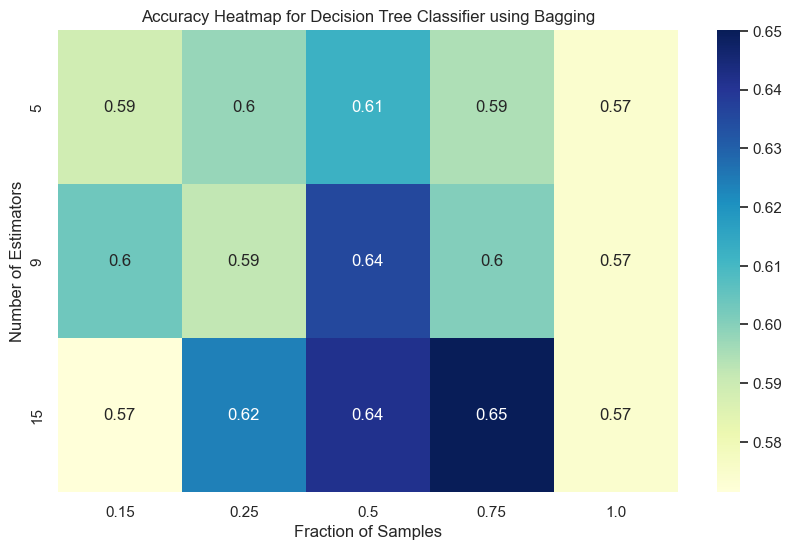

In [119]:
# Decision Tree Classifier:

num_estimators = [5, 9, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]

accuracy_matrix = np.zeros((len(num_estimators), len(fraction_samples)))

for i, num_estimator in enumerate(num_estimators):
    for j, fraction_sample in enumerate(fraction_samples):
        model = baggingClassifier(X_train, y_train, DecisionTreeClassifier_, num_estimators=num_estimator, fraction_samples=fraction_sample, voting='hard')
        model.fit()
        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred==y_test)
        accuracy_matrix[i, j] = accuracy

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=fraction_samples, yticklabels=num_estimators, cmap="YlGnBu", cbar=True)
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.title("Accuracy Heatmap for Decision Tree Classifier using Bagging")
plt.show()

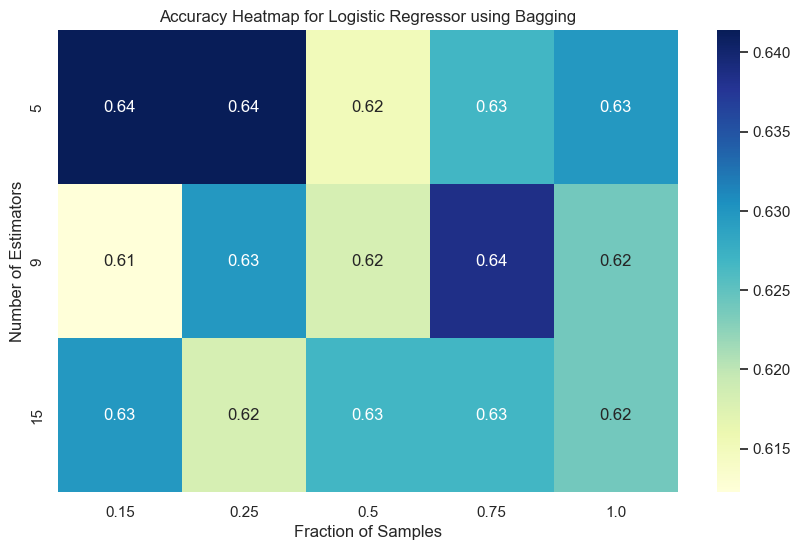

In [120]:
# Logistic Regressor:

num_estimators = [5, 9, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]

accuracy_matrix = np.zeros((len(num_estimators), len(fraction_samples)))

for i, num_estimator in enumerate(num_estimators):
    for j, fraction_sample in enumerate(fraction_samples):
        model = baggingClassifier(X_train, y_train, LogisticRegressor, num_estimators=num_estimator, fraction_samples=fraction_sample, voting='hard')
        model.fit()
        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred==y_test)
        accuracy_matrix[i, j] = accuracy

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=fraction_samples, yticklabels=num_estimators, cmap="YlGnBu", cbar=True)
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.title("Accuracy Heatmap for Logistic Regressor using Bagging")
plt.show()

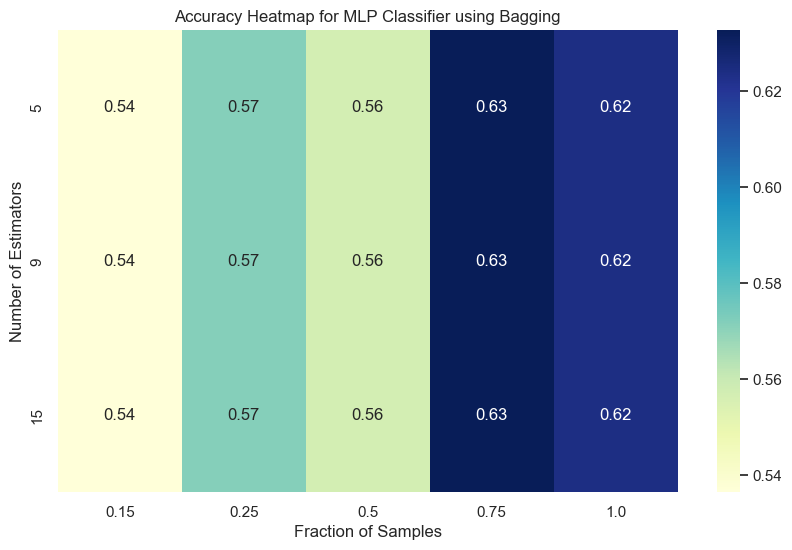

In [121]:
# MLP Classifier:

num_estimators = [5, 9, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]

accuracy_matrix = np.zeros((len(num_estimators), len(fraction_samples)))

for i, num_estimator in enumerate(num_estimators):
    for j, fraction_sample in enumerate(fraction_samples):
        model = baggingClassifier(X_train, y_train, MLPClassifier, num_estimators=num_estimator, fraction_samples=fraction_sample, voting='hard')
        model.fit()
        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred==y_test)
        accuracy_matrix[i, j] = accuracy

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=fraction_samples, yticklabels=num_estimators, cmap="YlGnBu", cbar=True)
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.title("Accuracy Heatmap for MLP Classifier using Bagging")
plt.show()

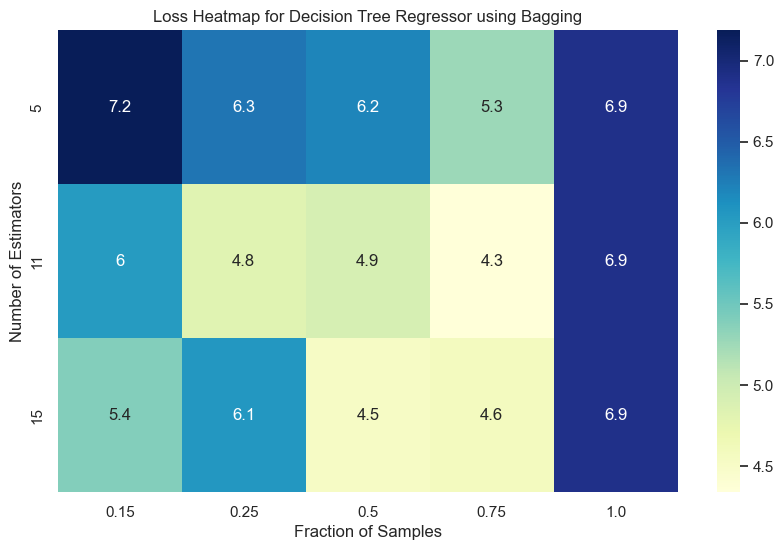

In [47]:
# Decision Tree Regression:

num_estimators = [5, 11, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]

loss_matrix = np.zeros((len(num_estimators), len(fraction_samples)))

for i, num_estimator in enumerate(num_estimators):
    for j, fraction_sample in enumerate(fraction_samples):
        model = baggingRegressor(X_train_, y_train_, DecisionTreeRegressor_, num_estimators=num_estimator, fraction_samples=fraction_sample, voting='hard')
        model.fit()
        y_pred = model.predict(X_test_).flatten()
        loss = (1/2) * np.mean((y_pred - y_test_)**2)
        loss_matrix[i, j] = loss

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(loss_matrix, annot=True, xticklabels=fraction_samples, yticklabels=num_estimators, cmap="YlGnBu", cbar=True)
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.title("Loss Heatmap for Decision Tree Regressor using Bagging")
plt.show()

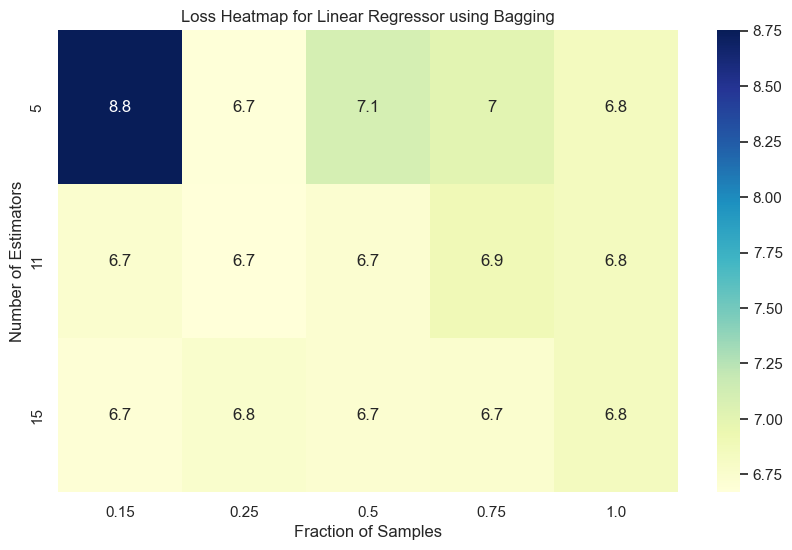

In [48]:
# Linear Regression:

num_estimators = [5, 11, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]

loss_matrix = np.zeros((len(num_estimators), len(fraction_samples)))

for i, num_estimator in enumerate(num_estimators):
    for j, fraction_sample in enumerate(fraction_samples):
        model = baggingRegressor(X_train_, y_train_, LinearRegressor, num_estimators=num_estimator, fraction_samples=fraction_sample, voting='hard')
        model.fit()
        y_pred = model.predict(X_test_).flatten()
        loss = (1/2) * np.mean((y_pred - y_test_)**2)
        loss_matrix[i, j] = loss

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(loss_matrix, annot=True, xticklabels=fraction_samples, yticklabels=num_estimators, cmap="YlGnBu", cbar=True)
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.title("Loss Heatmap for Linear Regressor using Bagging")
plt.show()

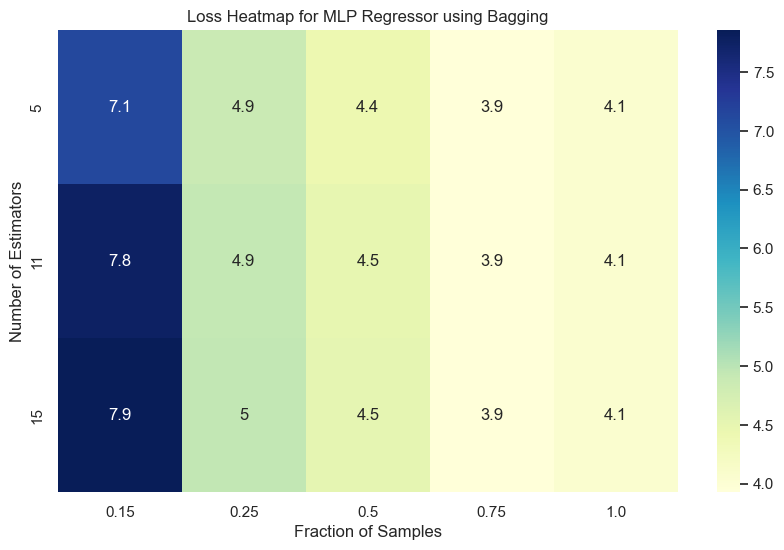

In [49]:
# MLP Regression:

num_estimators = [5, 11, 15]
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]

loss_matrix = np.zeros((len(num_estimators), len(fraction_samples)))

for i, num_estimator in enumerate(num_estimators):
    for j, fraction_sample in enumerate(fraction_samples):
        model = baggingRegressor(X_train_, y_train_, MLPRegressor, num_estimators=num_estimator, fraction_samples=fraction_sample, voting='hard')
        model.fit()
        y_pred = model.predict(X_test_).flatten()
        loss = (1/2) * np.mean((y_pred - y_test_)**2)
        loss_matrix[i, j] = loss

sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(loss_matrix, annot=True, xticklabels=fraction_samples, yticklabels=num_estimators, cmap="YlGnBu", cbar=True)
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.title("Loss Heatmap for MLP Regressor using Bagging")
plt.show()

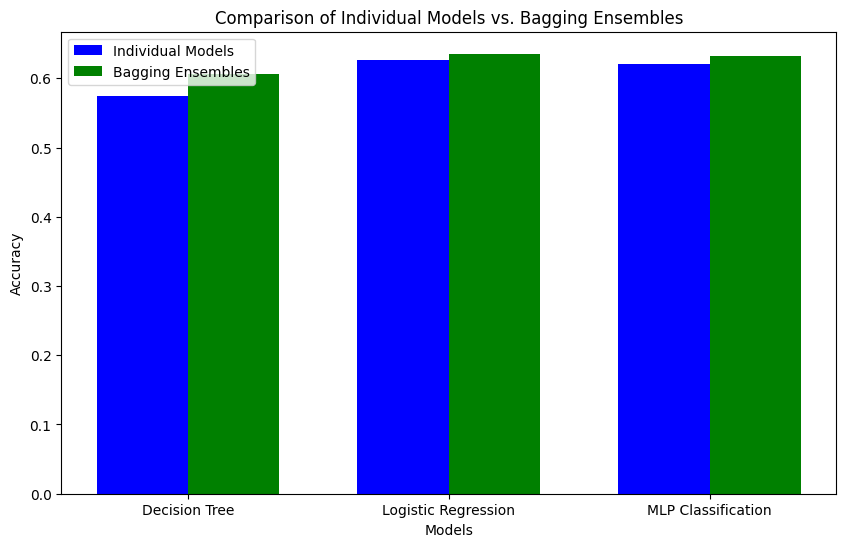

In [30]:
models = [DecisionTreeClassifier_, LogisticRegressor, MLPClassifier]

individual_accuracy = []
ensemble_accuracy = []

for model_name in models:
    model = model_name(X_train, y_train)
    model.fit()
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred==y_test)
    individual_accuracy.append(accuracy)

model = baggingClassifier(X_train, y_train, DecisionTreeClassifier_, num_estimators=9, fraction_samples=0.5, voting='hard')
model.fit()
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
ensemble_accuracy.append(accuracy)

model = baggingClassifier(X_train, y_train, LogisticRegressor, num_estimators=5, fraction_samples=0.5, voting='hard')
model.fit()
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
ensemble_accuracy.append(accuracy)

model = baggingClassifier(X_train, y_train, MLPClassifier, num_estimators=9, fraction_samples=0.75, voting='hard')
model.fit()
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
ensemble_accuracy.append(accuracy)

labels = ['Decision Tree', 'Logistic Regression', 'MLP Classification']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, individual_accuracy, width, label='Individual Models', color='blue')
plt.bar(x + width/2, ensemble_accuracy, width, label='Bagging Ensembles', color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Individual Models vs. Bagging Ensembles')
plt.xticks(x, labels)
plt.legend()
plt.show()

The bagging ensembles classifier performs better than the individual classifiers

### 3.2.4

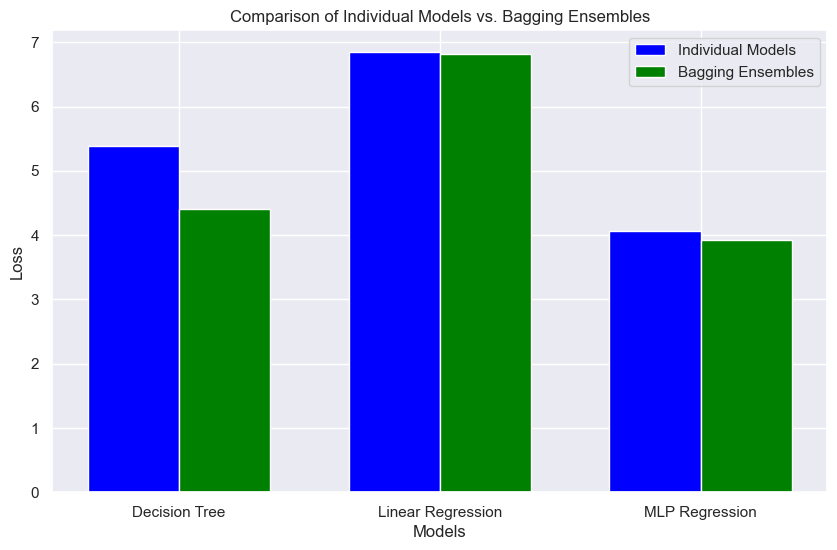

In [298]:
models = [DecisionTreeRegressor_, LinearRegressor, MLPRegressor]

individual_loss = []
ensemble_loss = []

for model_name in models:
    model = model_name(X_train_, y_train_)
    model.fit()
    y_pred = model.predict(X_test_).flatten()
    loss = (1/2) * np.mean((y_pred - y_test_)**2)
    individual_loss.append(loss)

model = baggingRegressor(X_train_, y_train_, DecisionTreeRegressor_, num_estimators=15, fraction_samples=0.5, voting='hard')
model.fit()
y_pred = model.predict(X_test_)
loss = (1/2) * np.mean((y_pred - y_test_)**2)
ensemble_loss.append(loss)

model = baggingRegressor(X_train_, y_train_, LinearRegressor, num_estimators=15, fraction_samples=0.75, voting='hard')
model.fit()
y_pred = model.predict(X_test_)
loss = (1/2) * np.mean((y_pred - y_test_)**2)
ensemble_loss.append(loss)

model = baggingRegressor(X_train_, y_train_, MLPRegressor, num_estimators=9, fraction_samples=0.75, voting='hard')
model.fit()
y_pred = model.predict(X_test_)
loss = (1/2) * np.mean((y_pred - y_test_)**2)
ensemble_loss.append(loss)

labels = ['Decision Tree', 'Linear Regression', 'MLP Regression']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, individual_loss, width, label='Individual Models', color='blue')
plt.bar(x + width/2, ensemble_loss, width, label='Bagging Ensembles', color='green')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Comparison of Individual Models vs. Bagging Ensembles')
plt.xticks(x, labels)
plt.legend()
plt.show()

the bagging ensembles regressor performs better than the individual regressors

# ENSEMBLING METHODS: STACKING 

### STACKING CLASSIFIER

In [31]:
def stackingClassifier(X, y, X_test, base_estimators= [LogisticRegressor, MLPClassifier, DecisionTreeClassifier_], meta_estimator=LogisticRegressor_(), method = 'stacking'):
    
    if(method == 'stacking'):
        K = 10
        # validation_predictions = np.zeros((X.shape[0], len(base_estimators)))
        validation_predictions = np.zeros(X.shape[0])
        kf = KFold(n_splits=K)

        for model_idx, model in enumerate(base_estimators):
            if model != DecisionTreeClassifier_:
                validation_prediction = np.zeros((X.shape[0], 11))
            else:
                validation_prediction = np.zeros((X.shape[0], 6))
            for train_index, val_index in kf.split(X):
                X_train_, X_val_ = X[train_index], X[val_index]
                y_train_, y_val_ = y[train_index], y[val_index]
                model_ = model(X_train_, y_train_)
                model_.fit()
                y_pred = model_.predict(X_val_)
                validation_prediction[val_index, :] = model_.predict_proba(X_val_)
            validation_predictions = np.column_stack((validation_predictions, validation_prediction))

        test_predictions = np.zeros(X_test.shape[0])
        for model in base_estimators:
            model_ = model(X, y)
            model_.fit()

            test_predictions = np.column_stack((test_predictions, model_.predict_proba(X_test)))

        # meta_learner = meta_estimator(validation_predictions, y)
        # if(meta_estimator == LogisticRegressor):
        #     meta_learner = meta_estimator
        # else:
        meta_learner = meta_estimator
        meta_learner.fit(validation_predictions[:, 1:], y)
        meta_predictions = meta_learner.predict(test_predictions[:, 1:])
        return meta_predictions

    
    else:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.40, random_state=42)

        val_predictions = np.zeros(X_val.shape[0])
        test_predictions = np.zeros(X_test.shape[0])

        for model_idx, model in enumerate(base_estimators):
            model_ = model(X_train, y_train)
            model_.fit()
            # print(model_)
            y_pred = model_.predict(X_val)
            # print(y_pred)
            val_predictions = np.column_stack((val_predictions, model_.predict_proba(X_val)))
            y_pred = model_.predict(X_test)
            test_predictions = np.column_stack((test_predictions, model_.predict_proba(X_test)))

        # meta_learner = meta_estimator(val_predictions[:, 1:], y_val)
        
        meta_learner = meta_estimator
        meta_learner.fit(val_predictions[:, 1:], y_val)
        meta_predictions = meta_learner.predict(test_predictions[:, 1:])
        return meta_predictions

In [32]:
X_train__, X_test__, y_train__, y_test__ = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
y_pred = stackingClassifier(X_train__, y_train__, X_test__, method = 'blending', meta_estimator=DecisionTreeClassifier())

accuracy = np.mean(y_pred==y_test__)
print(accuracy)

0.5676855895196506


In [214]:
# tuning the meta learner

# DecisionTreeClassifier:

max_depth = [5, 10, 15, 20]
max_features = [5, 8, 10]
criterion = ['gini', 'entropy']

accuracy_ = []
max_depth_ = []
max_features_ = []
criterion_ = []

for depth in max_depth:
    for features in max_features:
        for cri in criterion:
            meta_learner = DecisionTreeClassifier(max_depth = depth, max_features=features, criterion=cri)
            y_pred = stackingClassifier(X_train__, y_train__, X_test__, method = 'stacking', meta_estimator=meta_learner)
            accuracy = np.mean(y_pred==y_test__)
            max_depth_.append(depth)
            max_features_.append(features)
            criterion_.append(cri)
            accuracy_.append(accuracy)

In [215]:
df = pd.DataFrame({
    "max_depth": max_depth_,
    "max_features": max_features_,
    "criterion": criterion_,
    "accuracy": accuracy_
})

df = df.sort_values(by="accuracy", ascending = False)
df

,max_depth,max_features,criterion,accuracy
3,5,8,entropy,0.606987
5,5,10,entropy,0.602620
1,5,5,entropy,0.589520
4,5,10,gini,0.589520
10,10,10,gini,0.585153
8,10,8,gini,0.580786
0,5,5,gini,0.572052
2,5,8,gini,0.545852
6,10,5,gini,0.545852
22,20,10,gini,0.541485


In [220]:
# tuning the meta learner

# Logistic Regression:

learning_rate = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
lr_ = []
accuracy_ = []

for lr in learning_rate:
    meta_learner = LogisticRegressor_(learning_rate=lr)
    y_pred = stackingClassifier(X_train__, y_train__, X_test__, method="stacking", meta_estimator=meta_learner)
    accuracy = np.mean(y_pred == y_test__)
    lr_.append(lr)
    accuracy_.append(accuracy)


In [224]:
df = pd.DataFrame({
    "learning_rate": lr_,
    "accuracy": accuracy_,
})

df = df.sort_values(by = "accuracy", ascending=False)
df

,learning_rate,accuracy
2,0.0100,0.641921
3,0.0050,0.641921
0,0.1000,0.637555
1,0.0500,0.637555
4,0.0010,0.611354
5,0.0005,0.580786


### 3.3.2

In [225]:
methods = ['stacking', 'blending']
meta_estimators = [LogisticRegressor_(learning_rate=0.01), DecisionTreeClassifier(max_depth=5, max_features=8, criterion='entropy')]

for method in methods:
    for meta_estimator in meta_estimators:
        y_pred = stackingClassifier(X_train__, y_train__, X_test__, method=method, meta_estimator=meta_estimator)
        accuracy = np.mean(y_pred==y_test__)
        print("Method: ", method, ", Meta Estimator: ", meta_estimator, ", Accuracy: ", accuracy)

Method:  stacking , Meta Estimator:  <__main__.LogisticRegressor_ object at 0x000001E782E8E150> , Accuracy:  0.6419213973799127
Method:  stacking , Meta Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=8) , Accuracy:  0.6026200873362445
Method:  blending , Meta Estimator:  <__main__.LogisticRegressor_ object at 0x000001E782E8E150> , Accuracy:  0.611353711790393
Method:  blending , Meta Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=8) , Accuracy:  0.6506550218340611


### 3.3.3

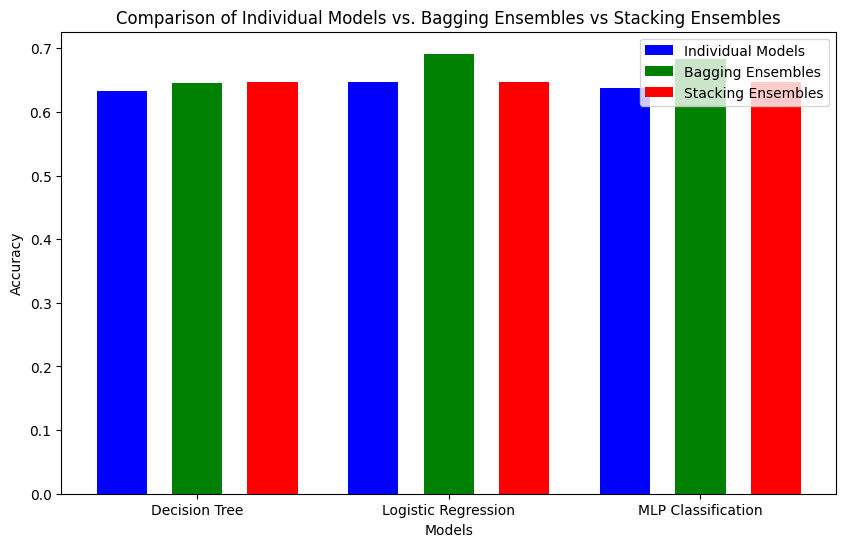

In [32]:
models = [DecisionTreeClassifier_, LogisticRegressor, MLPClassifier]

individual_accuracy = []
individual_time = []
bagging_accuracy = []
bagging_time = []

for model_name in models:
    start = time.time()
    model = model_name(X_train__, y_train__)
    model.fit()
    y_pred = model.predict(X_test__).flatten()
    accuracy = np.mean(y_pred==y_test__)
    individual_accuracy.append(accuracy)
    end = time.time()
    individual_time.append(end-start)

start = time.time()
model = baggingClassifier(X_train, y_train, DecisionTreeClassifier_, num_estimators=9, fraction_samples=0.25, voting='hard')
model.fit()
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
bagging_accuracy.append(accuracy)
end = time.time()
bagging_time.append(end-start)

start = time.time()
model = baggingClassifier(X_train, y_train, LogisticRegressor, num_estimators=9, fraction_samples=0.5, voting='hard')
model.fit()
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
bagging_accuracy.append(accuracy)
end = time.time()
bagging_time.append(end-start)

start = time.time()
model = baggingClassifier(X_train, y_train, MLPClassifier, num_estimators=15, fraction_samples=0.75, voting='hard')
model.fit()
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
bagging_accuracy.append(accuracy)
end = time.time()
bagging_time.append(end-start)

start = time.time()
y_pred = stackingClassifier(X_train__, y_train__, X_test__, method='stacking', meta_estimator=LogisticRegressor_(learning_rate=0.01))
accuracy = np.mean(y_pred==y_test__)
end = time.time()

stacking_accuracy = [accuracy, accuracy, accuracy]
stacking_time = [end-start, end-start, end-start]

labels = ['Decision Tree', 'Logistic Regression', 'MLP Classification']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, individual_accuracy, width, label='Individual Models', color='blue')
plt.bar(x, bagging_accuracy, width, label='Bagging Ensembles', color='green')
plt.bar(x + 3*width/2, stacking_accuracy, width, label='Stacking Ensembles', color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Individual Models vs. Bagging Ensembles vs Stacking Ensembles')
plt.xticks(x, labels)
plt.legend()
plt.show()

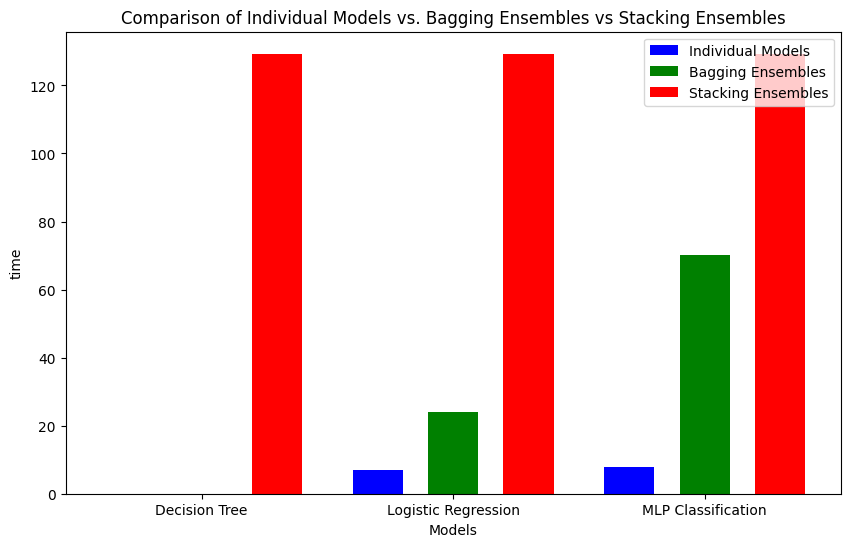

In [33]:
labels = ['Decision Tree', 'Logistic Regression', 'MLP Classification']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, individual_time, width, label='Individual Models', color='blue')
plt.bar(x, bagging_time, width, label='Bagging Ensembles', color='green')
plt.bar(x + 3*width/2, stacking_time, width, label='Stacking Ensembles', color='red')
plt.xlabel('Models')
plt.ylabel('time')
plt.title('Comparison of Individual Models vs. Bagging Ensembles vs Stacking Ensembles')
plt.xticks(x, labels)
plt.legend()
plt.show()

The ensemble method like bagging and stacking perform better than the individual classifiers. The stacking classifier performs better than the bagging classifier overall. But the run time of stacking is way more than bagging and individual classifiers.

### STACKING REGRESSOR

In [33]:
def stackingRegression(X, y, X_test, base_estimators= [LinearRegressor, MLPRegressor, DecisionTreeRegressor_], meta_estimator=LinearRegressor_(), method = 'stacking'):
    
    if(method == 'stacking'):
        K = 10
        validation_predictions = np.zeros((X.shape[0], len(base_estimators)))
        kf = KFold(n_splits=K)

        for model_idx, model in enumerate(base_estimators):
            for train_index, val_index in kf.split(X):
                X_train_, X_val_ = X[train_index], X[val_index]
                y_train_, y_val_ = y[train_index], y[val_index]
                model_ = model(X_train_, y_train_)
                model_.fit()
                y_pred = model_.predict(X_val_).flatten()
                validation_predictions[val_index, model_idx] = y_pred

        test_predictions = np.zeros(X_test.shape[0])
        for model in base_estimators:
            model_ = model(X, y)
            model_.fit()

            test_predictions = np.column_stack((test_predictions, model_.predict(X_test)))

        meta_learner = meta_estimator
        meta_learner.fit(validation_predictions, y)
        meta_predictions = meta_learner.predict(test_predictions[:, 1:])
        return meta_predictions
    
    else:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

        val_predictions = np.zeros(X_val.shape[0])
        test_predictions = np.zeros(X_test.shape[0])

        for model_idx, model in enumerate(base_estimators):
            model_ = model(X_train, y_train)
            model_.fit()
            y_pred = model_.predict(X_val).flatten()
            val_predictions = np.column_stack((val_predictions, y_pred))
            y_pred = model_.predict(X_test).flatten()
            test_predictions = np.column_stack((test_predictions, y_pred))

        meta_learner = meta_estimator
        meta_learner.fit(val_predictions[:, 1:], y_val)
        meta_predictions = meta_learner.predict(test_predictions[:, 1:])
        return meta_predictions

In [34]:
X_train__, X_test__, y_train__, y_test__ = train_test_split(X_, y_, test_size=0.20, random_state=42)
y_pred = stackingRegression(X_train__, y_train__, X_test__, method='stacking', meta_estimator=DecisionTreeRegressor())

loss = 1/2 * np.mean((y_pred-y_test__)**2)
print(loss)

9.652551020408163


In [236]:
# tuning the meta learner

# DecisionTreeRegressor:

max_depth = [5, 10, 15, 20]
max_features = [5, 8, 10]
criterion = ['absolute_error', 'squared_error', 'poisson']

loss_ = []
max_depth_ = []
max_features_ = []
criterion_ = []

for depth in max_depth:
    for features in max_features:
        for cri in criterion:
            meta_learner = DecisionTreeRegressor(max_depth = depth, max_features=features, criterion=cri)
            y_pred = stackingRegression(X_train__, y_train__, X_test__, method = 'stacking', meta_estimator=meta_learner)
            loss = 1/2 * np.mean((y_pred-y_test__)**2)
            max_depth_.append(depth)
            max_features_.append(features)
            criterion_.append(cri)
            loss_.append(loss)

In [237]:
df = pd.DataFrame({
    "max_depth": max_depth_,
    "max_features": max_features_,
    "criterion": criterion_,
    "loss": loss_
})

df = df.sort_values(by="loss")
df

,max_depth,max_features,criterion,loss
0,5,5,absolute_error,4.283291
3,5,8,absolute_error,4.283291
6,5,10,absolute_error,4.283291
1,5,5,squared_error,5.083715
4,5,8,squared_error,5.083715
7,5,10,squared_error,5.083715
2,5,5,poisson,5.520037
5,5,8,poisson,5.520037
8,5,10,poisson,5.520037
9,10,5,absolute_error,7.455281


In [243]:
# tuning the meta learner

# Linear Regression:

learning_rate = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
lr_ = []
loss_ = []

for lr in learning_rate:
    meta_learner = LinearRegressor_(learning_rate=lr)
    y_pred = stackingRegression(X_train__, y_train__, X_test__, method="stacking", meta_estimator=meta_learner)
    loss = 1/2 * np.mean((y_pred-y_test__)**2)
    lr_.append(lr)
    loss_.append(loss)


C:\Users\hp\AppData\Local\Temp\ipykernel_19184\1631033732.py:12: RuntimeWarning: overflow encountered in square
  loss = -1/(2*self.n_samples) * np.sum((y_actual-y_pred)**2)
C:\Users\hp\AppData\Local\Temp\ipykernel_19184\1631033732.py:28: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.learning_rate * gradient
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_19184\1631033732.py:12: RuntimeWarning: overflow encountered in square
  loss = -1/(2*self.n_samples) * np.sum((y_actual-y_pred)**2)
C:\Users\hp\AppData\Local\Temp\ipykernel_19184\1631033732.py:28: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.learning_rate * gradient
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fro

In [244]:
df = pd.DataFrame({
    "learing_rate": lr_,
    "loss": loss_
})

df = df.sort_values(by="loss")
df

,learing_rate,loss
3,0.0010,4.107019
5,0.0001,4.110959
4,0.0005,4.112624
0,0.0500,NaN
1,0.0100,NaN
2,0.0050,NaN


In [245]:
methods = ['stacking', 'blending']
meta_estimators = [LinearRegressor_(learning_rate=0.001), DecisionTreeRegressor(max_depth=5, max_features=5, criterion='absolute_error')]

for method in methods:
    for meta_estimator in meta_estimators:
        y_pred = stackingRegression(X_train__, y_train__, X_test__, method=method, meta_estimator=meta_estimator)
        loss = 1/2 * np.mean((y_pred-y_test__)**2)
        print("Method: ", method, ", Meta Estimator: ", meta_estimator, ", Loss: ", loss)

Method:  stacking , Meta Estimator:  <__main__.LinearRegressor_ object at 0x000001E782EB2510> , Loss:  4.107019043243698
Method:  stacking , Meta Estimator:  DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=5) , Loss:  4.283290816326531
Method:  blending , Meta Estimator:  <__main__.LinearRegressor_ object at 0x000001E782EB2510> , Loss:  3.61057202963431
Method:  blending , Meta Estimator:  DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=5) , Loss:  4.692614795918367


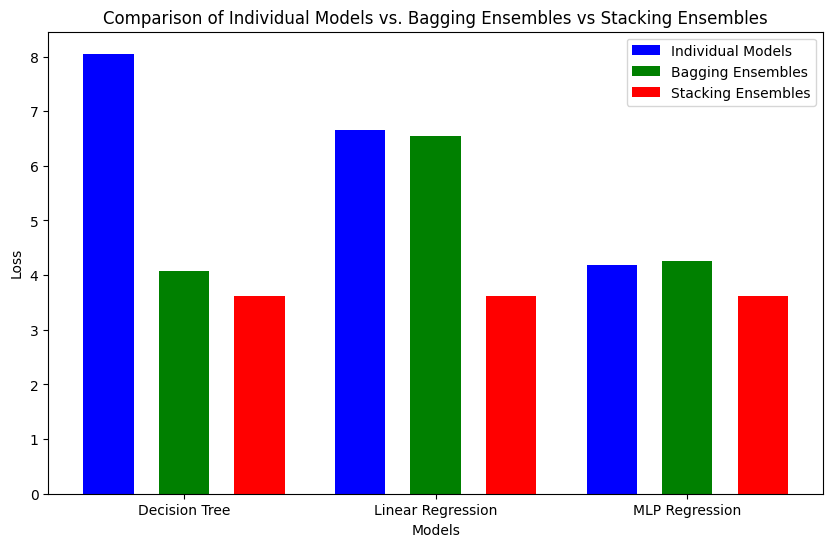

In [247]:
models = [DecisionTreeRegressor_, LinearRegressor, MLPRegressor]

individual_loss = []
individual_time = []
bagging_loss = []
bagging_time = []

for model_name in models:
    start = time.time()
    model = model_name(X_train__, y_train__)
    model.fit()
    y_pred = model.predict(X_test__).flatten()
    loss = (1/2) * np.mean((y_pred - y_test__)**2)
    individual_loss.append(loss)
    end = time.time()
    individual_time.append(end-start)

start = time.time()
model = baggingRegressor(X_train__, y_train__, DecisionTreeRegressor_, num_estimators=15, fraction_samples=0.75, voting='hard')
model.fit()
y_pred = model.predict(X_test__)
loss = (1/2) * np.mean((y_pred - y_test__)**2)
bagging_loss.append(loss)
end = time.time()
bagging_time.append(end-start)

start = time.time()
model = baggingRegressor(X_train__, y_train__, LinearRegressor, num_estimators=11, fraction_samples=0.5, voting='hard')
model.fit()
y_pred = model.predict(X_test__)
loss = (1/2) * np.mean((y_pred - y_test__)**2)
bagging_loss.append(loss)
end = time.time()
bagging_time.append(end-start)

start = time.time()
model = baggingRegressor(X_train__, y_train__, MLPRegressor, num_estimators=15, fraction_samples=0.75, voting='hard')
model.fit()
y_pred = model.predict(X_test__)
loss = (1/2) * np.mean((y_pred - y_test__)**2)
bagging_loss.append(loss)
end = time.time()
bagging_time.append(end-start)

start = time.time()
y_pred = stackingRegression(X_train__, y_train__, X_test__, method='blending', meta_estimator=LinearRegressor_(learning_rate= 0.001))
loss = 1/2 * np.mean((y_pred-y_test__)**2)
end = time.time()

stacking_loss = [loss, loss, loss]
stacking_time = [end-start, end-start, end-start]

labels = ['Decision Tree', 'Linear Regression', 'MLP Regression']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, individual_loss, width, label='Individual Models', color='blue')
plt.bar(x, bagging_loss, width, label='Bagging Ensembles', color='green')
plt.bar(x + 3*width/2, stacking_loss, width, label='Stacking Ensembles', color='red')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Comparison of Individual Models vs. Bagging Ensembles vs Stacking Ensembles')
plt.xticks(x, labels)
plt.legend()
plt.show()

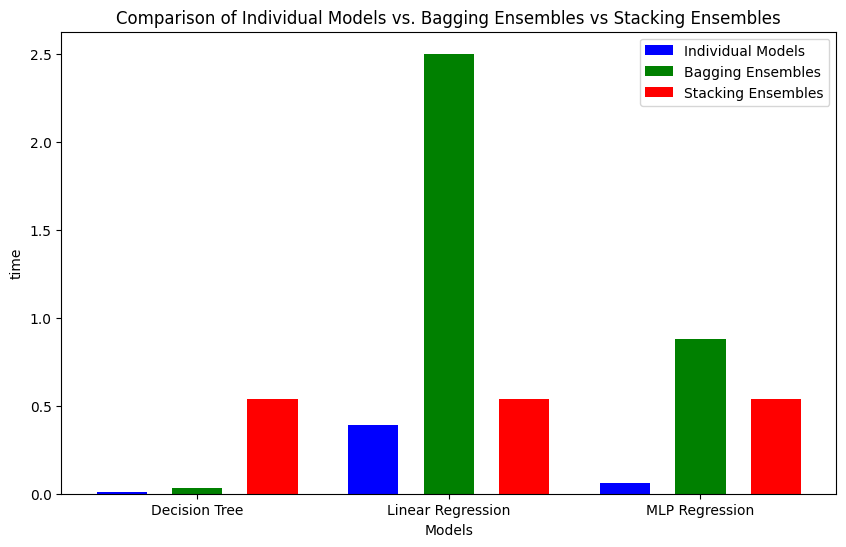

In [248]:
labels = ['Decision Tree', 'Linear Regression', 'MLP Regression']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, individual_time, width, label='Individual Models', color='blue')
plt.bar(x, bagging_time, width, label='Bagging Ensembles', color='green')
plt.bar(x + 3*width/2, stacking_time, width, label='Stacking Ensembles', color='red')
plt.xlabel('Models')
plt.ylabel('time')
plt.title('Comparison of Individual Models vs. Bagging Ensembles vs Stacking Ensembles')
plt.xticks(x, labels)
plt.legend()
plt.show()

the ensemble method like bagging and stacking perform better than the individual regressors. The stacking regressor performs better than the bagging regressor overall. But the run time of bagging is way more than stacking and individual regressors in case of linear regressor.

# RANDOM FOREST vs BOOSTED TREES

### RANDOM FOREST CLASSIFIER

In [35]:
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=10, max_features=0.2, criterion = 'gini'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            selected_features = np.random.choice(X.shape[1], int(self.max_features * X.shape[1]), replace=False)
            X_subset = X[:, selected_features]
            
            sample_indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_sampled = X_subset[sample_indices]
            y_sampled = y[sample_indices]
            
            tree = DecisionTreeClassifier(max_depth=self.max_depth, criterion=self.criterion)
            tree.fit(X_sampled, y_sampled)
            self.estimators.append((tree, selected_features))

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.estimators)))

        for i, (tree, selected_features) in enumerate(self.estimators):
            X_subset = X[:, selected_features]
            predictions[:, i] = tree.predict(X_subset)
        
        final_predictions = []  
        for i in range(X.shape[0]):
            votes = Counter(predictions[i])
            final_predictions.append(votes.most_common(1)[0][0])
        return final_predictions


In [39]:
y_scaled = y>5

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)

In [37]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=0.2)
model.fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print(accuracy)

0.7510917030567685


In [40]:
num_estimators = [50, 75, 100, 125, 150]
max_depth = [10, 15, 20]
max_features = [0.2, 0.4, 0.6, 0.8, 1.0]
criterion = ['gini', 'entropy']

num_estimators_ = []
max_depth_ = []
max_features_ = []
criterion_ = []
accuracy_ = []

for num_estimator in num_estimators:
    for depth in max_depth:
        for feature in max_features:
            for cri in criterion:
                model = RandomForestClassifier(n_estimators=num_estimator, max_depth=depth, max_features=feature, criterion = cri)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = np.mean(y_pred==y_test)
                num_estimators_.append(num_estimator)
                max_depth_.append(depth)
                max_features_.append(feature)
                criterion_.append(cri)
                accuracy_.append(accuracy)

In [41]:
df = pd.DataFrame({
    "num_estimators": num_estimators_,
    "max_depth": max_depth_,
    "max_features": max_features_,
    "criterion": criterion_,
    "accuracy": accuracy_
})

df = df.sort_values(by='accuracy', ascending=False)
df

,num_estimators,max_depth,max_features,criterion,accuracy
53,75,20,0.4,entropy,0.812227
39,75,10,1.0,entropy,0.807860
24,50,20,0.6,gini,0.807860
55,75,20,0.6,entropy,0.807860
33,75,10,0.4,entropy,0.803493
...,...,...,...,...,...
31,75,10,0.2,entropy,0.729258
40,75,15,0.2,gini,0.724891
10,50,15,0.2,gini,0.724891
110,125,20,0.2,gini,0.724891


### RANDOM FOREST REGRESSOR

In [36]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=10, max_features=0.2, criterion = 'squared_error'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            selected_features = np.random.choice(X.shape[1], int(self.max_features * X.shape[1]), replace=False)
            X_subset = X[:, selected_features]
            
            sample_indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_sampled = X_subset[sample_indices]
            y_sampled = y[sample_indices]
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, criterion=self.criterion)
            tree.fit(X_sampled, y_sampled)
            self.estimators.append((tree, selected_features))

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.estimators)))

        for i, (tree, selected_features) in enumerate(self.estimators):
            X_subset = X[:, selected_features]
            predictions[:, i] = tree.predict(X_subset)
        
        final_predictions = []  
        for i in range(X.shape[0]):
            final_predictions.append(np.mean(predictions[i]))
        return final_predictions


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.20, random_state=42)

In [44]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=0.8)
model.fit(X_train, y_train)

In [45]:
y_pred = model.predict(X_test)
loss = 1/2 * np.mean((y_pred-y_test)**2)
print(loss)

3.829845083148565


In [150]:
num_estimators = [50, 75, 100, 125, 150]
max_depth = [10, 15, 20]
max_features = [0.2, 0.4, 0.6, 0.8, 1.0]
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

num_estimators_ = []
max_depth_ = []
max_features_ = []
criterion_ = []
loss_ = []

for num_estimator in num_estimators:
    for depth in max_depth:
        for feature in max_features:
            for cri in criterion:
                model = RandomForestRegressor(n_estimators=num_estimator, max_depth=depth, max_features=feature, criterion= cri)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                loss = 1/2 * np.mean((y_pred-y_test)**2)
                num_estimators_.append(num_estimator)
                max_depth_.append(depth)
                max_features_.append(feature)
                criterion_.append(cri)
                loss_.append(loss)

In [151]:
df = pd.DataFrame({
    "num_estimators": num_estimators_,
    "max_depth": max_depth_,
    "max_features": max_features_,
    "criterion": criterion_,
    "loss": loss_
})

df = df.sort_values(by='loss')
df

,num_estimators,max_depth,max_features,criterion,loss
193,125,10,0.8,absolute_error,3.406774
293,150,20,0.8,absolute_error,3.415115
194,125,10,0.8,friedman_mse,3.438046
14,50,10,0.8,friedman_mse,3.439704
255,150,10,0.8,poisson,3.478630
...,...,...,...,...,...
162,100,20,0.2,friedman_mse,9.387639
23,50,15,0.2,poisson,9.452481
101,75,20,0.2,absolute_error,9.470376
180,125,10,0.2,squared_error,9.690391


### ADABOOST CLASSIFIER

In [91]:
class AdaBoostClassifier:
    def __init__(self, base_estimator = DecisionTreeClassifier, n_estimators = 50):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_classes = 2
        sample_weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=2)
            model.fit(X, y, sample_weight=sample_weights)

            y_pred = model.predict(X)
            incorrect = y != y_pred

            error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)
            alpha = np.log((1 - error) / max(error, 1e-10)) + np.log(n_classes - 1)
            # print(alpha)
            sample_weights *= np.exp(alpha * incorrect)
            # print(sample_weights)
            sample_weights /= np.sum(sample_weights)

            self.alphas.append(alpha)
            self.models.append(model)

    def feature_importance_(self, X):
        importance = np.zeros(X.shape[1])
        for tree in self.models:
            importance += tree.feature_importances_
        importance /= len(self.models)
        return importance
    
    def predict(self, X, threshold = 0.5):
        n_samples = X.shape[0]
        final_predictions = np.zeros(n_samples)
        sum_alpha = 0
        for alpha, model in zip(self.alphas, self.models):
            predictions = model.predict(X)
            # print(alpha)
            final_predictions += alpha * predictions
            sum_alpha += alpha

        # print(final_predictions)
        return (final_predictions/sum_alpha >= threshold).astype(int)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)

In [93]:
base_estimator = DecisionTreeClassifier
model = AdaBoostClassifier(n_estimators=50, base_estimator=base_estimator)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print(accuracy)

0.759825327510917


In [94]:
num_estimators = range(25, 400, 5)

num_estimators_ = []
accuracy_ = []
inference_time = []

for num_estimator in num_estimators:
    start = time.time()
    model = AdaBoostClassifier(n_estimators=num_estimator, base_estimator=base_estimator)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    end = time.time()
    accuracy = np.mean(y_pred==y_test)
    accuracy_.append(accuracy)
    num_estimators_.append(num_estimator)
    inference_time.append(end-start)


In [96]:
df = pd.DataFrame({
    "num_estimator": num_estimators_,
    "accuracy": accuracy_,
    "inference time": inference_time
})

df = df.sort_values(by="accuracy", ascending=False)
df

,num_estimator,accuracy,inference time
0,25,0.777293,0.100730
2,35,0.772926,0.163091
4,45,0.772926,0.209410
8,65,0.772926,0.183481
10,75,0.772926,0.325104
...,...,...,...
71,380,0.733624,1.132498
16,105,0.733624,0.312197
12,85,0.733624,0.278274
62,335,0.733624,0.914191


Text(0.5, 1.0, 'Inference Time vs. Number of Estimators')

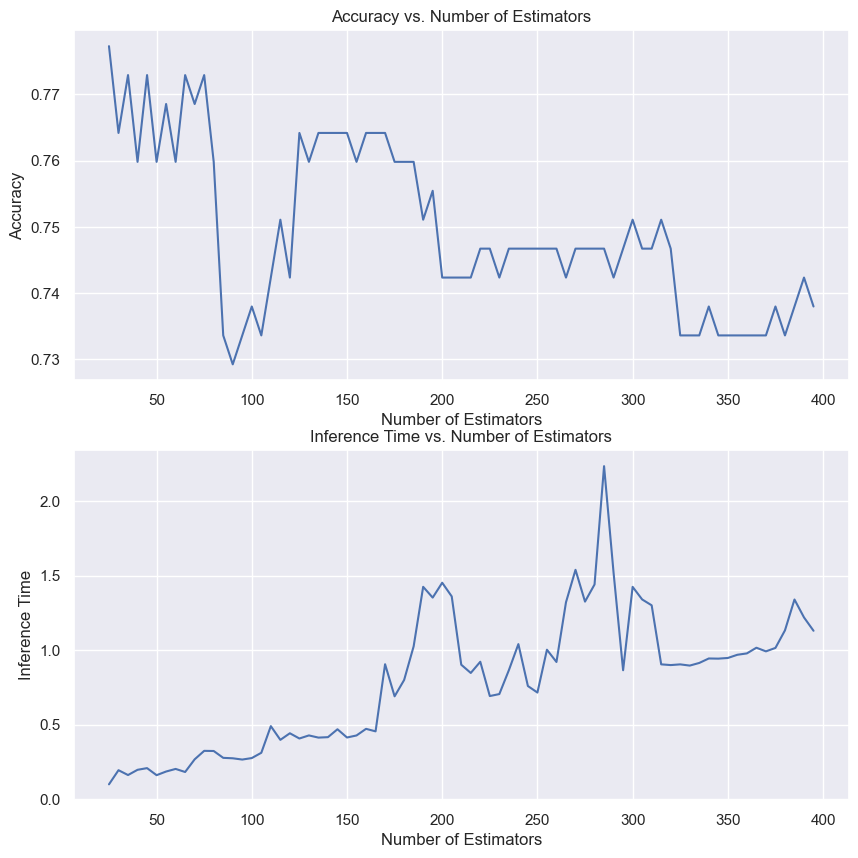

In [97]:
plt.figure(figsize=(10, 10)) 

plt.subplot(2, 1, 1)
plt.plot(num_estimators_, accuracy_)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators")

plt.subplot(2, 1, 2)
plt.plot(num_estimators_, inference_time)
plt.xlabel("Number of Estimators")
plt.ylabel("Inference Time")
plt.title("Inference Time vs. Number of Estimators")


In [98]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print(accuracy)

0.6899563318777293


### ADA BOOST REGRESSOR

In [99]:
class AdaBoostRegressor:
    def __init__(self, base_estimator = DecisionTreeRegressor, n_estimators = 50):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            model = self.base_estimator(max_depth = 2)
            model.fit(X, y, sample_weight=sample_weights)

            y_pred = model.predict(X)

            errors = np.abs(y_pred - y)
            max_error = np.max(errors)
            error_normalised = errors/max_error

            error_weighted_sum = np.sum(sample_weights*error_normalised)
            alpha = error_weighted_sum / max(1 - error_weighted_sum, 1e-10)

            # z = np.sum(sample_weights* alpha**(1-error_normalised))
            sample_weights *= alpha**(1-error_normalised)
            sample_weights /= max(np.sum(sample_weights), 1e-10)
            # print(sample_weights)

            self.alphas.append(np.log(1/alpha))
            self.models.append(model)
    
    def predict(self, X):
        n_samples = X.shape[0]
        weighted_votes = np.zeros(n_samples)
        sum_alphas = 0
        for alpha, model in zip(self.alphas, self.models):
            predictions = model.predict(X)
            # print(alpha)
            weighted_votes += alpha* predictions
            sum_alphas += alpha


        return weighted_votes / sum_alphas

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [101]:
model = AdaBoostRegressor(n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(y_pred)
loss = 1/2 * np.mean((y_pred-y_test)**2)
# loss = 1/2 *(y_pred-y_test)**2
print(loss)

6.824694350825499


In [102]:
num_estimators = range(25, 400, 5)

num_estimators_ = []
loss_ = []
inference_time = []

for num_estimator in num_estimators:
    start = time.time()
    model = AdaBoostRegressor(n_estimators=num_estimator)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    end = time.time()
    loss = 1/2 * np.mean((y_pred-y_test)**2)
    loss_.append(loss)
    num_estimators_.append(num_estimator)
    inference_time.append(end-start)


In [103]:
df = pd.DataFrame({
    "num_estimator": num_estimators_,
    "loss": loss_,
    "inference time": inference_time
})

df = df.sort_values(by="loss")
df

,num_estimator,loss,inference time
2,35,6.638984,0.166574
9,70,6.721942,0.185536
1,30,6.746876,0.163561
12,85,6.785709,0.222959
8,65,6.794681,0.191990
...,...,...,...
63,340,7.163032,0.865307
58,315,7.163032,0.792241
73,390,7.163032,1.039935
41,230,7.177306,0.604462


Text(0.5, 1.0, 'Inference Time vs. Number of Estimators')

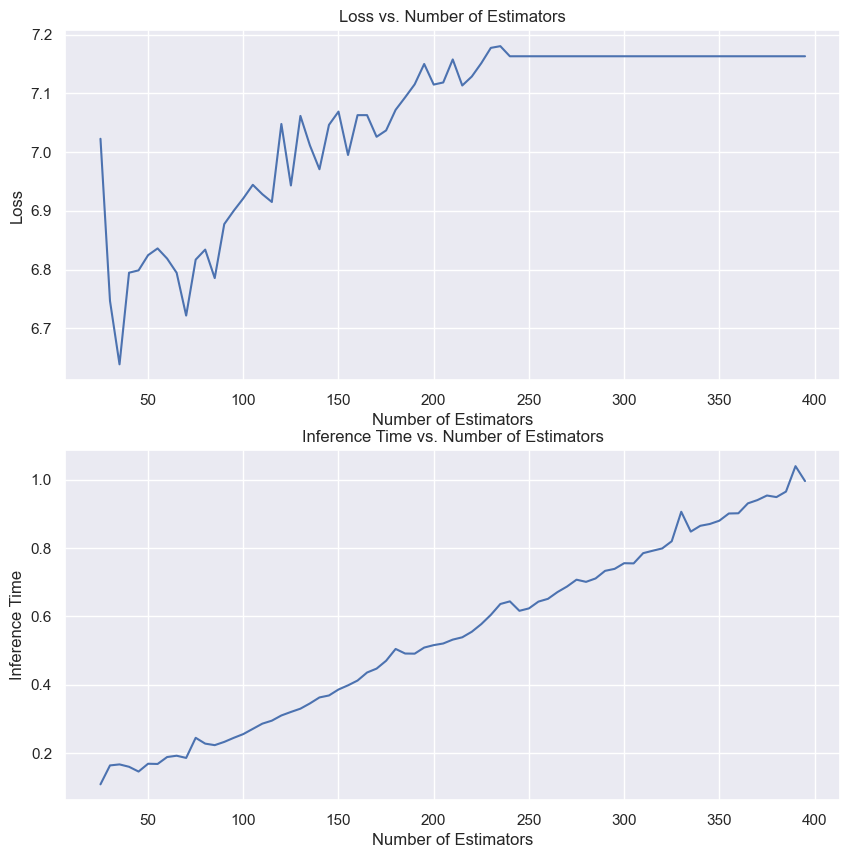

In [104]:
plt.figure(figsize=(10, 10)) 

plt.subplot(2, 1, 1)
plt.plot(num_estimators_, loss_)
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.title("Loss vs. Number of Estimators")

plt.subplot(2, 1, 2)
plt.plot(num_estimators_, inference_time)
plt.xlabel("Number of Estimators")
plt.ylabel("Inference Time")
plt.title("Inference Time vs. Number of Estimators")


### GRAIDENT BOOSTING REGRESSOR

In [106]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators = 100, learning_rate = 0.1, max_depth = 3, max_features = 5, criterion = 'squared_error'):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.estimators = []
    
    def fit(self, X_train, y_train):
        self.initial_prediction = np.mean(y_train)

        predictions = self.initial_prediction * np.ones(y_train.shape[0])
        for _ in range(self.n_estimators):
            residuals = y_train - predictions
            tree = DecisionTreeRegressor(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
            tree.fit(X_train, residuals)
            self.estimators.append(tree)

            tree_predictions = tree.predict(X_train)
            predictions += self.learning_rate * tree_predictions
        
    
    def predict(self, X):
        predictions =   np.zeros(X.shape[0])
        for tree in self.estimators:
            predictions += self.learning_rate * tree.predict(X)
        return predictions + self.initial_prediction

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [54]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
loss = 1/2 * np.mean((y_pred-y_test)**2)
print(loss)

3.706677723756058


In [121]:
max_depth = [2, 3, 5]
max_features = [5, 8, 10]
learning_rate = [0.5, 0.1, 0.05, 0.01]
criterion = ['squared_error', 'absolute_error', 'friedman_mse']
num_estimators = [50, 100, 150, 200, 150, 300]

max_depth_ = []
max_features_ = []
learning_rate_ = []
criterion_ = []
num_estimators_ = []
loss_ = []

for num_estimator in num_estimators:
    for depth in max_depth: 
        for feature in max_features:
            for lr in learning_rate:
                for cri in criterion:
                    model = GradientBoostingRegressor(n_estimators=num_estimator, max_depth=depth, max_features=feature, learning_rate=lr, criterion=cri)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    loss = 1/2 * np.mean((y_pred-y_test)**2)
                    max_depth_.append(depth)
                    max_features_.append(feature)
                    learning_rate_.append(lr)
                    criterion_.append(cri)
                    loss_.append(loss)
                    num_estimators_.append(num_estimator)

In [122]:
df = pd.DataFrame({
    "max_depth": max_depth_,
    "max_features": max_features_,
    "learning_rate": learning_rate_,
    "criterion": criterion_,
    "num_estimators": num_estimators_,
    "loss": loss_
})

df = df.sort_values(by="loss")
df

,max_depth,max_features,learning_rate,criterion,num_estimators,loss
512,5,5,0.05,friedman_mse,150,2.901000
315,5,10,0.10,squared_error,150,2.956341
641,5,10,0.10,friedman_mse,300,2.984269
618,5,5,0.05,squared_error,300,2.994095
615,5,5,0.10,squared_error,300,3.005789
...,...,...,...,...,...,...
35,2,10,0.01,friedman_mse,50,16.337572
33,2,10,0.01,squared_error,50,16.347777
9,2,5,0.01,squared_error,50,16.364374
21,2,8,0.01,squared_error,50,16.394473


In [108]:
num_estimators = range(25, 400, 5)

num_estimators_ = []
loss_ = []
inference_time = []

for num_estimator in num_estimators:
    start = time.time()
    model = GradientBoostingRegressor(n_estimators=num_estimator, max_depth=5, max_features=10, learning_rate=0.1, criterion='squared_error')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    end = time.time()
    loss = 1/2 * np.mean((y_pred-y_test)**2)
    loss_.append(loss)
    num_estimators_.append(num_estimator)
    inference_time.append(end-start)


Text(0.5, 1.0, 'Inference Time vs. Number of Estimators')

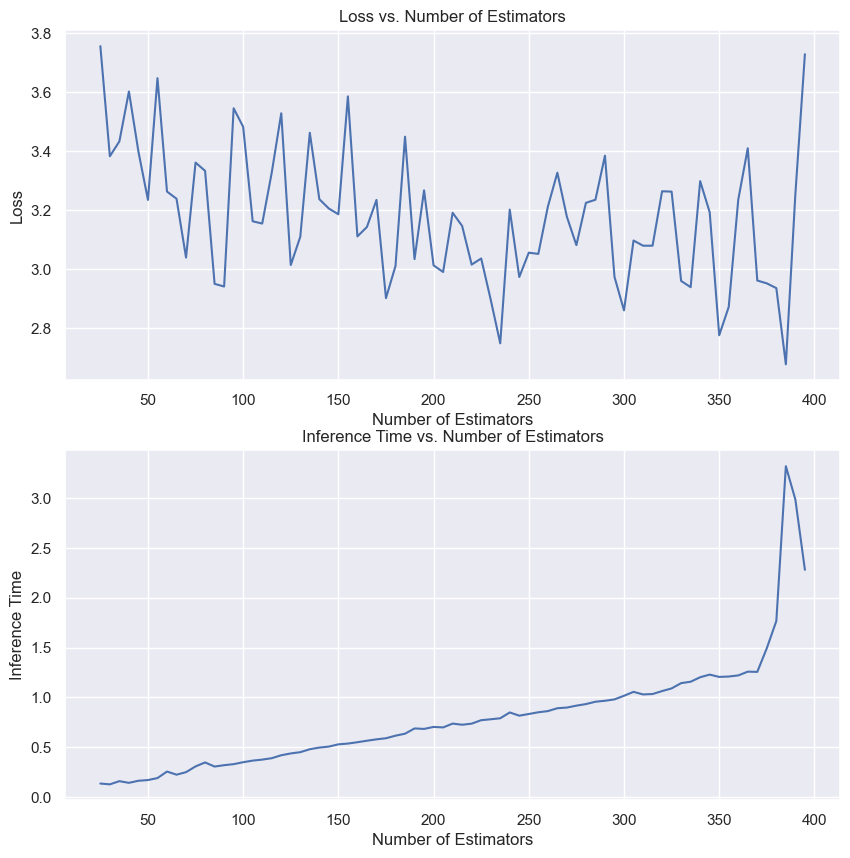

In [109]:
plt.figure(figsize=(10, 10)) 

plt.subplot(2, 1, 1)
plt.plot(num_estimators_, loss_)
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.title("Loss vs. Number of Estimators")

plt.subplot(2, 1, 2)
plt.plot(num_estimators_, inference_time)
plt.xlabel("Number of Estimators")
plt.ylabel("Inference Time")
plt.title("Inference Time vs. Number of Estimators")


### GRADIENT BOOSTING CLASSIFIER

In [111]:
class gradientBoostingClassifier:
    def __init__(self, n_estimators = 100, learning_rate = 0.1, max_depth = 3, max_features = 5, criterion = 'squared_error'):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.estimators = []
        self.values = []

    def fit(self, X, y):
        self.init_logodds = np.log(np.sum(y) / (len(y) - np.sum(y)))
        self.init_probability = 1 / (1 + np.exp(-self.init_logodds))

        logodds = self.init_logodds * np.ones(y.shape[0])
        probabilities = self.init_probability * np.ones(y.shape[0])
        for _ in range(self.n_estimators):
            residuals = y - probabilities
            tree = DecisionTreeRegressor(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
            tree.fit(X, residuals)
            self.estimators.append(tree)

            leaves_indices = tree.apply(X)
            unique_indices = np.unique(leaves_indices)
            probabilities_sum = np.zeros(np.max(leaves_indices)+1)
            residuals_sum = np.zeros(np.max(leaves_indices)+1)
            values = np.zeros(np.max(leaves_indices)+1)
            for i in range(len(leaves_indices)):
                probabilities_sum[leaves_indices[i]] += probabilities[i]*(1-probabilities[i])
                residuals_sum[leaves_indices[i]] += residuals[i]
            
            
            probabilities_sum[probabilities_sum == 0] = 1e-10
            values[unique_indices] = residuals_sum[unique_indices] / probabilities_sum[unique_indices]
            leaves_values = values[leaves_indices]
            logodds += self.learning_rate * leaves_values
            probabilities = 1 / (1 + np.exp(-logodds))
            self.values.append(values)
    
    def predict(self, X):
        logodds = self.init_logodds * np.ones(X.shape[0])
        probabilities = self.init_probability * np.ones(X.shape[0])
        for tree, values in zip(self.estimators, self.values):
            leaves_indices = tree.apply(X)     
            leaves_values = values[leaves_indices]
            logodds += self.learning_rate * leaves_values
            probabilities = 1 / (1 + np.exp(-logodds))
        return np.round(probabilities)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [113]:
model = gradientBoostingClassifier(n_estimators = 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print(accuracy)

0.7685589519650655


In [137]:
max_depth = [2, 3, 5]
max_features = [5, 8, 10]
learning_rate = [0.5, 0.1, 0.05, 0.01]
criterion = ['squared_error', 'absolute_error', 'friedman_mse']
num_estimators = [50, 100, 150, 200, 250]

max_depth_ = []
max_features_ = []
learning_rate_ = []
criterion_ = []
num_estimators_ = []
accuracy_ = []

for num_estimator in num_estimators:
    for depth in max_depth: 
        for feature in max_features:
            for lr in learning_rate:
                for cri in criterion:
                    model = gradientBoostingClassifier(n_estimators=num_estimator, max_depth=depth, max_features=feature, learning_rate=lr, criterion=cri)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    accuracy = np.mean(y_pred==y_test)
                    max_depth_.append(depth)
                    max_features_.append(feature)
                    learning_rate_.append(lr)
                    criterion_.append(cri)
                    accuracy_.append(accuracy)
                    num_estimators_.append(num_estimator)

In [138]:
df = pd.DataFrame({
    "max_depth": max_depth_,
    "max_features": max_features_,
    "learning_rate": learning_rate_,
    "criterion": criterion_,
    "num_estimators": num_estimators_,
    "accuracy": accuracy_
})

df = df.sort_values(by="accuracy", ascending=False)
df

,max_depth,max_features,learning_rate,criterion,num_estimators,accuracy
77,5,5,0.10,friedman_mse,50,0.807860
198,5,8,0.05,squared_error,100,0.794760
39,3,5,0.10,squared_error,50,0.794760
212,5,10,0.05,friedman_mse,100,0.794760
296,5,5,0.05,friedman_mse,150,0.794760
...,...,...,...,...,...,...
85,5,8,0.50,absolute_error,50,0.711790
70,3,10,0.01,absolute_error,50,0.711790
313,5,10,0.50,absolute_error,150,0.707424
301,5,8,0.50,absolute_error,150,0.703057


In [114]:
num_estimators = range(25, 400, 5)

num_estimators_ = []
accuracy_ = []
inference_time = []

for num_estimator in num_estimators:
    start = time.time()
    model = gradientBoostingClassifier(n_estimators=num_estimator, max_depth=5, max_features=8, learning_rate=0.05, criterion='squared_error')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    end = time.time()
    accuracy = np.mean(y_pred == y_test)
    accuracy_.append(accuracy)
    num_estimators_.append(num_estimator)
    inference_time.append(end-start)


Text(0.5, 1.0, 'Inference Time vs. Number of Estimators')

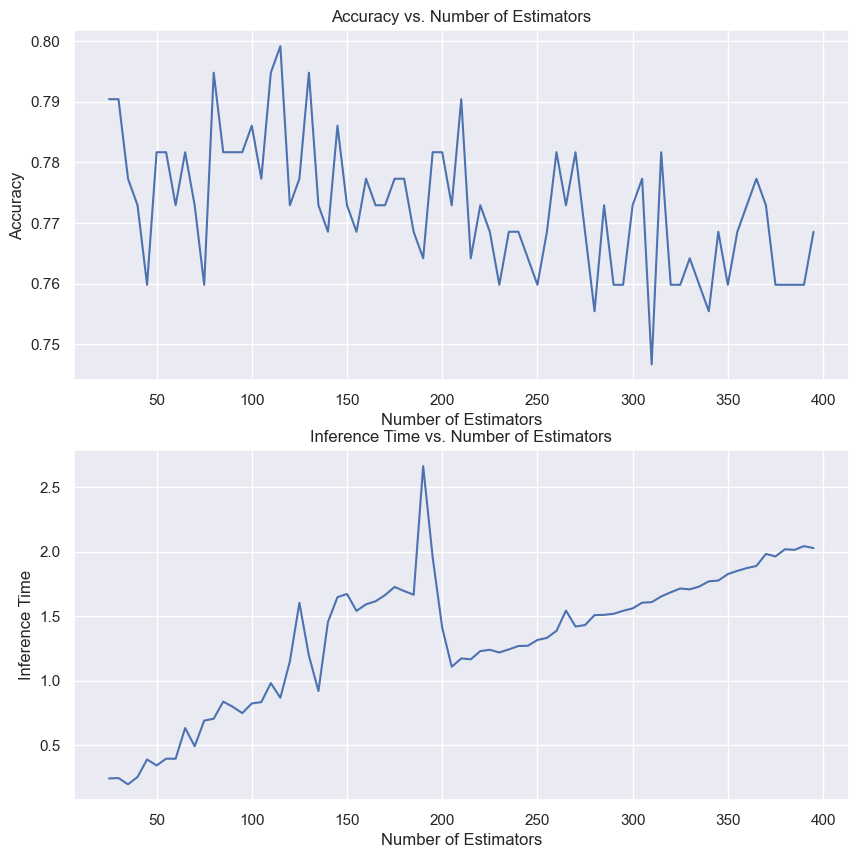

In [115]:
plt.figure(figsize=(10, 10)) 

plt.subplot(2, 1, 1)
plt.plot(num_estimators_, accuracy_)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators")

plt.subplot(2, 1, 2)
plt.plot(num_estimators_, inference_time)
plt.xlabel("Number of Estimators")
plt.ylabel("Inference Time")
plt.title("Inference Time vs. Number of Estimators")


#### Comparison of Random Forest and Boosted Trees

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42) 

In [59]:
rf = []
ab = []
gb = []

rf_time = []
ab_time = []
gb_time = []

start = time.time()
model = RandomForestClassifier(n_estimators=75, max_depth=20, max_features=0.4, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
accuracy = np.mean(y_pred==y_test)
rf.append(accuracy)
rf_time.append(end-start)

start = time.time()
model = AdaBoostClassifier(n_estimators=25, base_estimator=DecisionTreeClassifier)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
accuracy = np.mean(y_pred==y_test)
ab.append(accuracy)
ab_time.append(end-start)

start = time.time()
model = gradientBoostingClassifier(n_estimators=50, max_depth=5, max_features=5, learning_rate=0.1, criterion='friedman_mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
accuracy = np.mean(y_pred==y_test)
gb.append(accuracy)
gb_time.append(end-start)

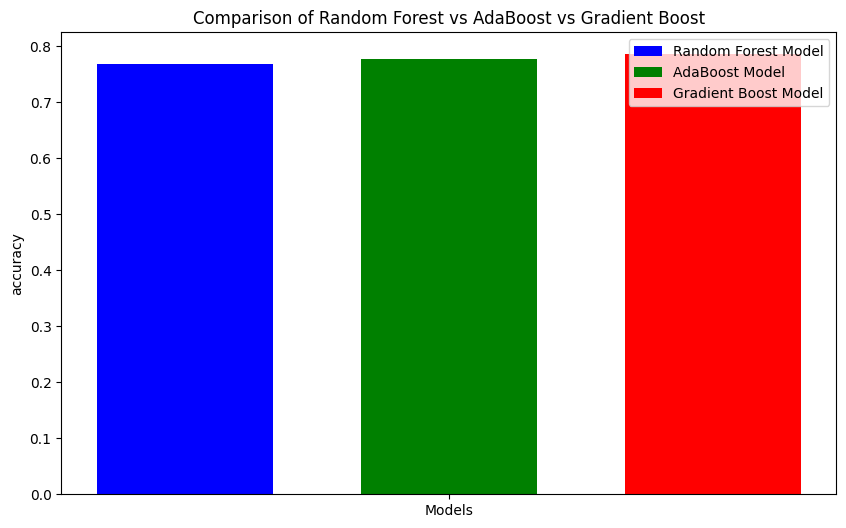

In [62]:
labels = ['Models']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, rf, width, label='Random Forest Model', color='blue')
plt.bar(x, ab, width, label='AdaBoost Model', color='green')
plt.bar(x + 3*width/2, gb, width, label='Gradient Boost Model', color='red')
# plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Comparison of Random Forest vs AdaBoost vs Gradient Boost')
plt.xticks(x, labels)
plt.legend()
plt.show()

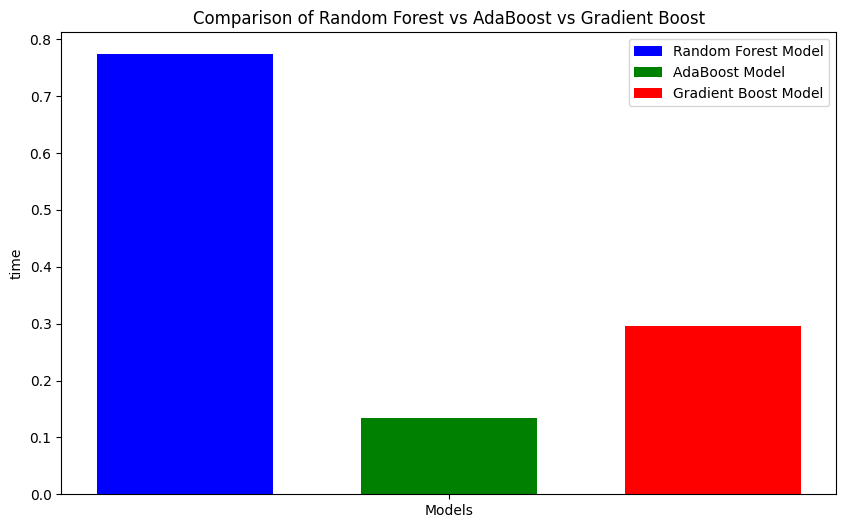

In [63]:
labels = ['Models']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, rf_time, width, label='Random Forest Model', color='blue')
plt.bar(x, ab_time, width, label='AdaBoost Model', color='green')
plt.bar(x + 3*width/2, gb_time, width, label='Gradient Boost Model', color='red')
# plt.xlabel('Models')
plt.ylabel('time')
plt.title('Comparison of Random Forest vs AdaBoost vs Gradient Boost')
plt.xticks(x, labels)
plt.legend()
plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [65]:
rf = []
ab = []
gb = []

rf_time = []
ab_time = []
gb_time = []

start = time.time()
model = RandomForestRegressor(n_estimators=125, max_depth=10, max_features=0.8, criterion='absolute_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
loss = 1/2 * np.mean((y_pred-y_test)**2)
rf.append(loss)
rf_time.append(end-start)

start = time.time()
model = AdaBoostRegressor(n_estimators=25, base_estimator=DecisionTreeRegressor)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
loss = 1/2 * np.mean((y_pred-y_test)**2)
ab.append(loss)
ab_time.append(end-start)

start = time.time()
model = GradientBoostingRegressor(n_estimators=50, max_depth=5, max_features=5, learning_rate=0.1, criterion='friedman_mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
loss = 1/2 * np.mean((y_pred-y_test)**2)
gb.append(loss)
gb_time.append(end-start)

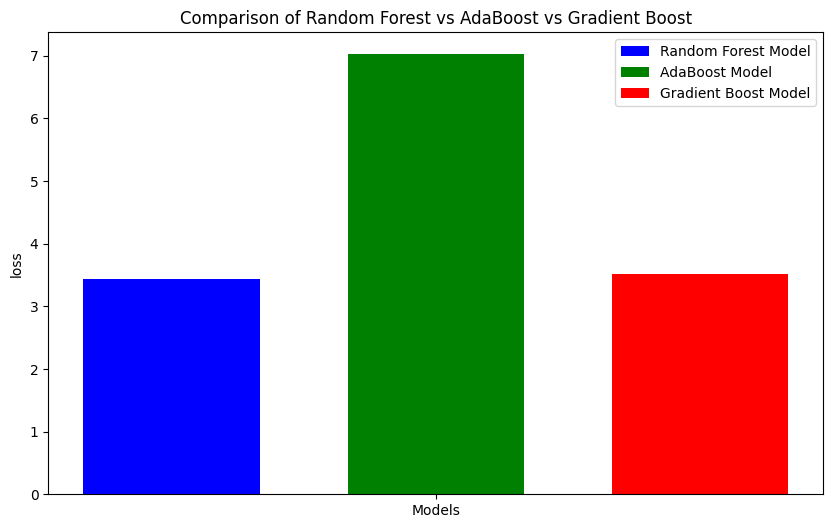

In [66]:
labels = ['Models']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, rf, width, label='Random Forest Model', color='blue')
plt.bar(x, ab, width, label='AdaBoost Model', color='green')
plt.bar(x + 3*width/2, gb, width, label='Gradient Boost Model', color='red')
# plt.xlabel('Models')
plt.ylabel('loss')
plt.title('Comparison of Random Forest vs AdaBoost vs Gradient Boost')
plt.xticks(x, labels)
plt.legend()
plt.show()

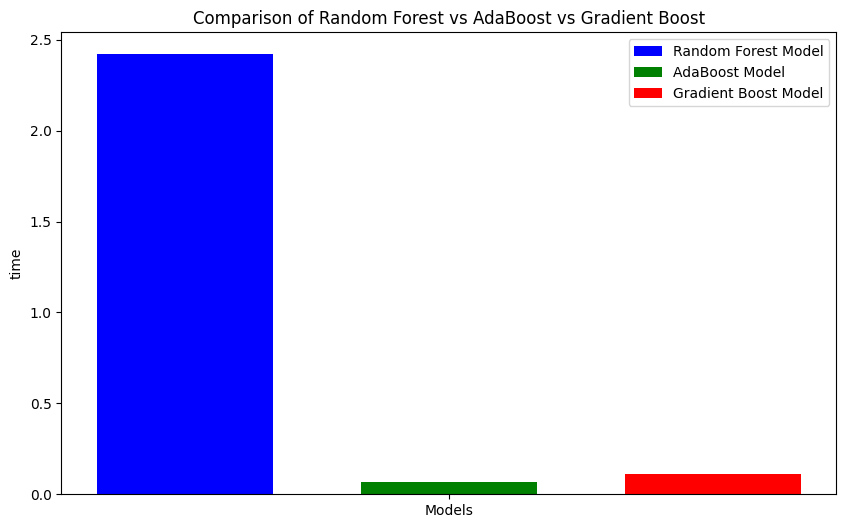

In [67]:
labels = ['Models']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
width = 0.2
plt.bar(x - 3*width/2, rf_time, width, label='Random Forest Model', color='blue')
plt.bar(x, ab_time, width, label='AdaBoost Model', color='green')
plt.bar(x + 3*width/2, gb_time, width, label='Gradient Boost Model', color='red')
# plt.xlabel('Models')
plt.ylabel('time')
plt.title('Comparison of Random Forest vs AdaBoost vs Gradient Boost')
plt.xticks(x, labels)
plt.legend()
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=75, max_depth=20, max_features=0.4, criterion='entropy')
random_forest.fit(X_train, y_train)

adaboost = AdaBoostClassifier(n_estimators=25, base_estimator=DecisionTreeClassifier)
adaboost.fit(X_train, y_train)

gradient_boost = gradientBoostingClassifier(n_estimators=50, max_depth=5, max_features=5, learning_rate=0.1, criterion='friedman_mse')
gradient_boost.fit(X_train, y_train)

In [66]:
predictions_rf = random_forest.predict(X_test)
predictions_adaboost = adaboost.predict(X_test)
predictions_gb = gradient_boost.predict(X_test)

In [67]:
misclassified_rf = np.where(predictions_rf != y_test)[0]
misclassified_adaboost = np.where(predictions_adaboost != y_test)[0]
misclassified_gb = np.where(predictions_gb != y_test)[0]

In [68]:
# percent of common misclassifications between rf and adaboost
print(len(np.intersect1d(misclassified_rf, misclassified_adaboost))/len(misclassified_rf))

0.6078431372549019


In [69]:
# percent of common misclassifications between rf and gb
print(len(np.intersect1d(misclassified_rf, misclassified_gb))/len(misclassified_rf))

0.7254901960784313


In [70]:
# percent of common misclassifications between gb and adaboost
print(len(np.intersect1d(misclassified_gb, misclassified_adaboost))/len(misclassified_gb))

0.6666666666666666


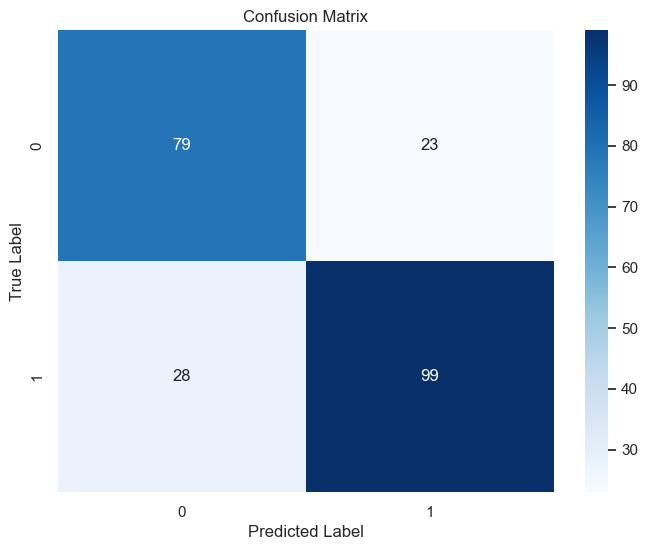

In [71]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, predictions_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

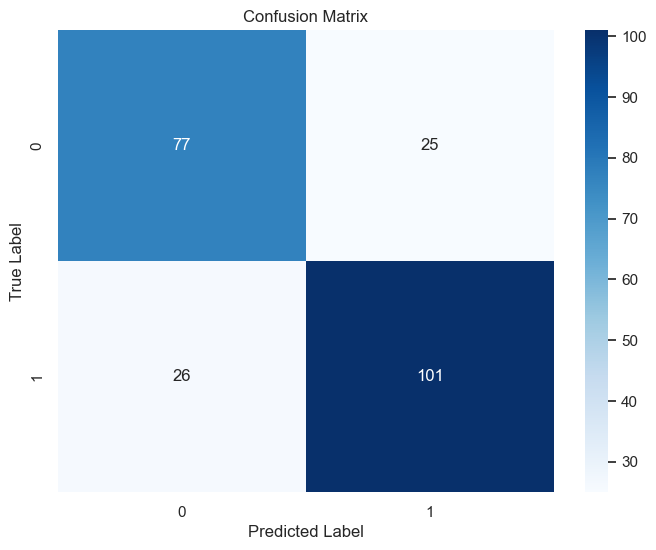

In [72]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, predictions_adaboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

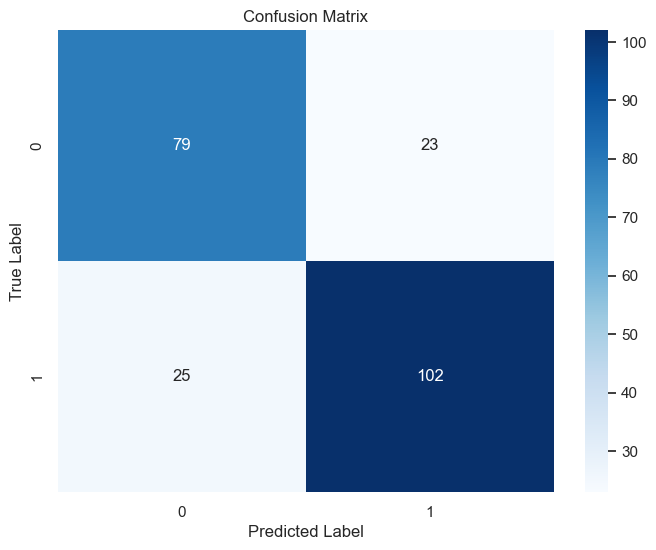

In [73]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, predictions_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

From the confusion matrix above we can see that the confusion matrix resembles a lot to each other. The no of false positives and false negatives are almost same in both the models. The accuracy of the boosted trees is slightly better than the random forest.

In [74]:
X_test_misclassified = X_test[misclassified_adaboost]
misclassified_indices = np.zeros(X_test.shape[0])
misclassified_indices[misclassified_adaboost] = 1

In [75]:
feature_importance = adaboost.feature_importance_(X_train)
feature_importance

array([0.02392202, 0.11493896, 0.0538177 , 0.01814624, 0.09795053,
       0.06550231, 0.11980959, 0.18679443, 0.03117112, 0.15413247,
       0.13381462])

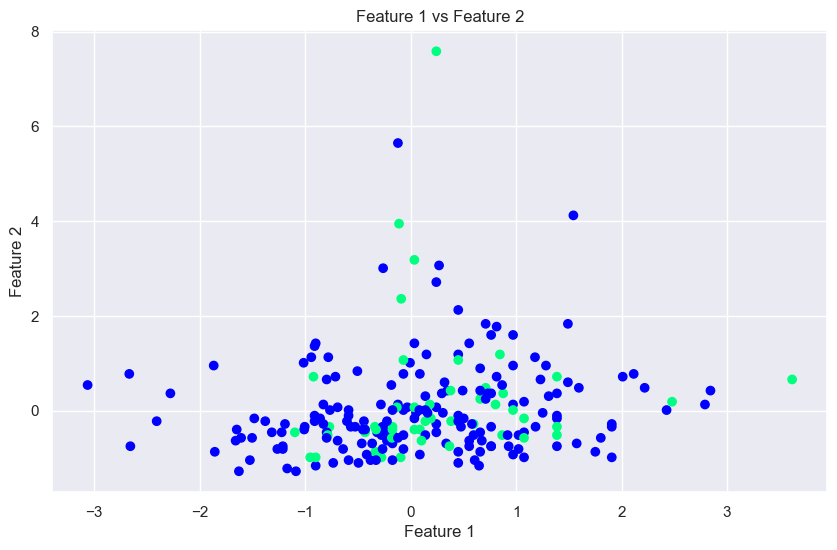

In [76]:
X_feature1 = X_test[:, 7]
X_feature2 = X_test[:, 9]

plt.figure(figsize=(10, 6))
plt.scatter(X_feature1, X_feature2, c=misclassified_indices, cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')
plt.show()


In [77]:
X_test_misclassified = X_test[misclassified_rf]
misclassified_indices = np.zeros(X_test.shape[0])
misclassified_indices[misclassified_rf] = 1

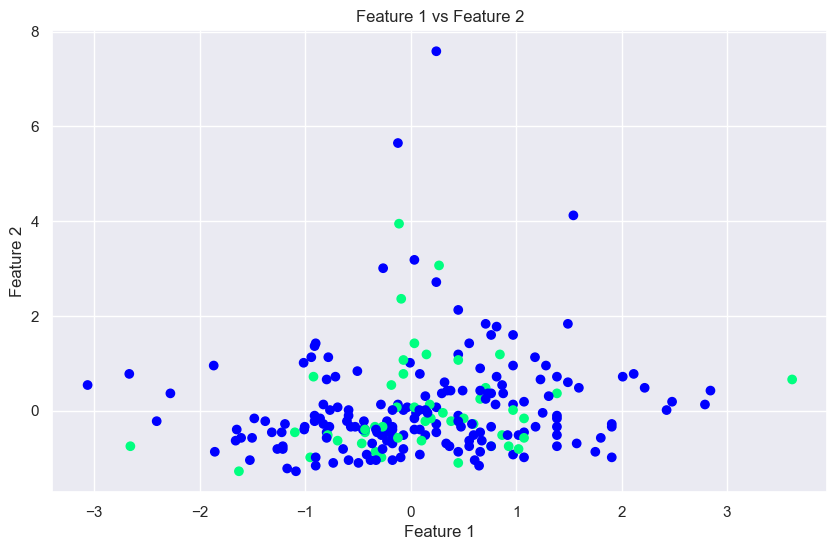

In [78]:
X_feature1 = X_test[:, 7]
X_feature2 = X_test[:, 9]

plt.figure(figsize=(10, 6))
plt.scatter(X_feature1, X_feature2, c=misclassified_indices, cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')
plt.show()


In [79]:
X_test_misclassified = X_test[misclassified_gb]
misclassified_indices = np.zeros(X_test.shape[0])
misclassified_indices[misclassified_gb] = 1

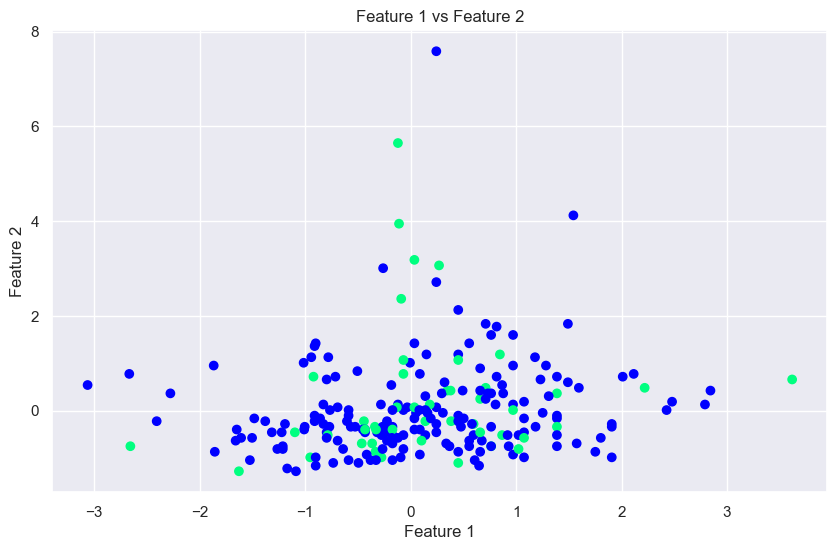

In [80]:
X_feature1 = X_test[:, 7]
X_feature2 = X_test[:, 9]

plt.figure(figsize=(10, 6))
plt.scatter(X_feature1, X_feature2, c=misclassified_indices, cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')
plt.show()


The distribution of the misclassified samples are pretty much the same in all the three cases. This shows that the models are very similar to each other. Though the accuracy of the boosted trees is slightly better than the random forest.